# Import Libraries

In [1]:
# NOT-USED LIBRARIES
# import seaborn as sns
# from math import sqrt


# OTHERS
import datetime
import calendar



# NUMPY LIBRARIES
import numpy as np
from numpy import concatenate



# PANDAS LIBRARIES
import pandas as pd
###################
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime



# MATPLOTLIB LIBRARIES
import matplotlib
#################
from matplotlib import pyplot as plt



# SKLEARN LIBRARIES
import sklearn
##############
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
##############
from sklearn import model_selection
from sklearn.model_selection import train_test_split
##############
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as ev_sk_mae
from sklearn.metrics import mean_squared_error as ev_sk_mse
from sklearn.metrics import mean_absolute_percentage_error as ev_sk_mape



# KERAS LIBRARIES
import keras
############
from keras.models import Sequential
############
from keras.layers import LSTM
from keras.layers import Dense
############
from keras.optimizers import RMSprop
from keras.optimizers import SGD
############
from keras.losses import MeanAbsoluteError as ev_kr_mae
from keras.losses import MeanSquaredError as ev_kr_mse
from keras.losses import MeanAbsolutePercentageError as ev_kr_mape
from keras.losses import losses_utils



# TENSORFLOW LIBRARIES
import tensorflow as tf

/home/xsif/anaconda3/envs/env005_energypredappliances/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the dataset

In [2]:
#import the dataset in dataframe
data = pd.read_csv("../datasets/01_KAG_energydata_complete/KAG_energydata_complete.csv")

In [3]:
data.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [4]:
print ("Number of columns:", len(data.columns))

Number of columns: 29


In [5]:
print ("Number of rows:", len(data))

Number of rows: 19735


# Initializing variables

In [6]:
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

## Based on analysis, we remove other columns and only keep the columns listed in 'features' variable

In [7]:
col_time=["date"]

feature=[
    "RH_out",
    "RH_8",
    "RH_1",
    "T3",
    "RH_3",
    "T2",
    "Press_mm_hg",
    "RH_2",
    "RH_7",
    "T8",
    "RH_6",
    "RH_4",
    "RH_5",
    "T_out",
    "RH_9",
    "T4",
    "T7",
    "Tdewpoint",
    "Windspeed",
    "T1",
    "T5"
]

col_target = ["Appliances"]

## - Colors

In [8]:
asif_graph_color_theme_monthly = "#ff9900"
asif_graph_color_theme_weekdays = "#ff9900"
asif_graph_color_theme_weekends = "#038cfc"
asif_colors = ["#ff9900", "#00a3cc", "#004d99"]

# Predefined Functions

In [9]:
# tmp_num_vars = 1 if type(scaled) is list else scaled.shape[1]
# tmp_dataframe = DataFrame(scaled)
# tmp_cols, tmp_names = list(), list()
# for tmp_i in range(1, 0, -1):
#     tmp_cols.append(tmp_dataframe.shift(tmp_i))
#     tmp_names += [('var%d(t-%d)' % (tmp_j+1, tmp_i)) for tmp_j in range(tmp_num_vars)]
# print (tmp_names)
# print ("\n\n\n\n\n\n\n")
# # print (tmp_cols)

# for tmp_i in range(0, 1):
#     tmp_cols.append(tmp_dataframe.shift(-tmp_i))
#     if tmp_i == 0:
#         tmp_names += [('var%d(t)' % (tmp_j+1)) for tmp_j in range(tmp_num_vars)]
#     else:
#         tmp_names += [('var%d(t+%d)' % (tmp_j+1, tmp_i)) for tmp_j in range(tmp_num_vars)]
# print (tmp_names)
# # print ("\n\n\n\n\n\n\n")

In [10]:
# del tmp_num_vars, tmp_dataframe, tmp_cols, tmp_names, tmp_i, tmp_j

In [11]:
# convert series to supervised learning
def series_to_supervised(dataset, n_in=1, n_out=1, dropnan=True):
    num_vars = 1 if type(dataset) is list else dataset.shape[1]
    dataframe = DataFrame(dataset)
    cols, names = list(), list()
    
    # print ("\n\n\n\n\n\n\n******start******\ndataframe:\n")
    # print (dataframe)
    
    # input sequence (t-n, ....t-1)
    for i in range(n_in, 0, -1):
        cols.append(dataframe.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(num_vars)]
    # forecast sequence (t, t+1 .... t+n)
    # print ("******end******\n\n\n\n\n\n\n******start******\ncols[0] / (t) (after loop # 1):\n")
    # print (cols[0])
    
    for i in range(0, n_out):
        cols.append(dataframe.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(num_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(num_vars)]
    
    # print ("******end******\n\n\n\n\n\n\n******start******\ncols[1] (t-1) (after loop # 2):\n")
    # print (cols[1])
    
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names

    # print ("******end******\n\n\n\n\n\n\n******start******\nagg (i.e., aggregation of col[0] (t-1):\n")
    # print (agg["var1(t-1)"])
    # print ("(i.e., aggregation of col[1] (t)):\n")
    # print (agg["var1(t)"])
    
    # print ("******end******\n\n\n\n\n\n\n******start******\ncolumn names of agg:\n")
    # print (names)
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    # print ("******end******\n\n\n\n\n\n\n******start******\nagg (i.e., aggregation of col[0] and col[1]):\n")
    # print (agg)
    
    return agg

In [12]:
# scaled[0]

In [13]:
# values[0]

In [14]:
# tmp_reframed = series_to_supervised(scaled, 1, 1)

In [15]:
# del tmp_reframed

# Preparing dataset

## cloning dataset into 'data1'

In [16]:
data1 = data[col_target + col_time + feature]

In [17]:
data1.head()

Appliances                 date  RH_out       RH_8       RH_1     T3  \
0          60  2016-01-11 17:00:00    92.0  48.900000  47.596667  19.79   
1          60  2016-01-11 17:10:00    92.0  48.863333  46.693333  19.79   
2          50  2016-01-11 17:20:00    92.0  48.730000  46.300000  19.79   
3          50  2016-01-11 17:30:00    92.0  48.590000  46.066667  19.79   
4          60  2016-01-11 17:40:00    92.0  48.590000  46.333333  19.79   

        RH_3    T2  Press_mm_hg       RH_2  ...       RH_4   RH_5     T_out  \
0  44.730000  19.2        733.5  44.790000  ...  45.566667  55.20  6.600000   
1  44.790000  19.2        733.6  44.722500  ...  45.992500  55.20  6.483333   
2  44.933333  19.2        733.7  44.626667  ...  45.890000  55.09  6.366667   
3  45.000000  19.2        733.8  44.590000  ...  45.723333  55.09  6.250000   
4  45.000000  19.2        733.9  44.530000  ...  45.530000  55.09  6.133333   

    RH_9         T4         T7  Tdewpoint  Windspeed     T1         T5  
0  45.53  19.000000  17.200000        5.3   7.000000  19.89  17.166667  
1  45.56  19.000000  17.200000        5.2   6.666667  19.89  17.166667  
2  45.50  18.926667  17.200000        5.1   6.333333  19.89  17.166667  
3  45.40  18.890000  17.133333        5.0   6.000000  19.89  17.166667  
4  45.40  18.890000  17.200000        4.9   5.666667  19.89  17.200000  

[5 rows x 23 columns]

## indexing the dataset over the column 'date'

In [18]:
data1["date"]=pd.to_datetime(data1["date"])
data1 = data1.set_index(['date'], drop=True)

/tmp/ipykernel_44545/3224050610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["date"]=pd.to_datetime(data1["date"])


In [19]:
data1 = data1.sort_values("date", ascending=True)

In [20]:
data1.head()

Appliances  RH_out       RH_8       RH_1     T3  \
date                                                                   
2016-01-11 17:00:00          60    92.0  48.900000  47.596667  19.79   
2016-01-11 17:10:00          60    92.0  48.863333  46.693333  19.79   
2016-01-11 17:20:00          50    92.0  48.730000  46.300000  19.79   
2016-01-11 17:30:00          50    92.0  48.590000  46.066667  19.79   
2016-01-11 17:40:00          60    92.0  48.590000  46.333333  19.79   

                          RH_3    T2  Press_mm_hg       RH_2       RH_7  ...  \
date                                                                     ...   
2016-01-11 17:00:00  44.730000  19.2        733.5  44.790000  41.626667  ...   
2016-01-11 17:10:00  44.790000  19.2        733.6  44.722500  41.560000  ...   
2016-01-11 17:20:00  44.933333  19.2        733.7  44.626667  41.433333  ...   
2016-01-11 17:30:00  45.000000  19.2        733.8  44.590000  41.290000  ...   
2016-01-11 17:40:00  45.000000  19.2        733.9  44.530000  41.230000  ...   

                          RH_4   RH_5     T_out   RH_9         T4         T7  \
date                                                                           
2016-01-11 17:00:00  45.566667  55.20  6.600000  45.53  19.000000  17.200000   
2016-01-11 17:10:00  45.992500  55.20  6.483333  45.56  19.000000  17.200000   
2016-01-11 17:20:00  45.890000  55.09  6.366667  45.50  18.926667  17.200000   
2016-01-11 17:30:00  45.723333  55.09  6.250000  45.40  18.890000  17.133333   
2016-01-11 17:40:00  45.530000  55.09  6.133333  45.40  18.890000  17.200000   

                     Tdewpoint  Windspeed     T1         T5  
date                                                         
2016-01-11 17:00:00        5.3   7.000000  19.89  17.166667  
2016-01-11 17:10:00        5.2   6.666667  19.89  17.166667  
2016-01-11 17:20:00        5.1   6.333333  19.89  17.166667  
2016-01-11 17:30:00        5.0   6.000000  19.89  17.166667  
2016-01-11 17:40:00        4.9   5.666667  19.89  17.200000  

[5 rows x 22 columns]

### now, we can access the dataset rows using date as an 'index' (using date value) in addition to '0-n'

In [21]:
data1.columns

Index(['Appliances', 'RH_out', 'RH_8', 'RH_1', 'T3', 'RH_3', 'T2',
       'Press_mm_hg', 'RH_2', 'RH_7', 'T8', 'RH_6', 'RH_4', 'RH_5', 'T_out',
       'RH_9', 'T4', 'T7', 'Tdewpoint', 'Windspeed', 'T1', 'T5'],
      dtype='object')

In [22]:
len(data1.columns)

22

In [23]:
data1.Appliances["2016-01-11 23:50:00"]

40

In [24]:
data1.loc["2016-02-01":"2016-02-29"]

Appliances     RH_out       RH_8       RH_1         T3  \
date                                                                          
2016-02-01 00:00:00          40  94.000000  55.152222  46.433333  21.700000   
2016-02-01 00:10:00          50  93.500000  55.571667  46.433333  21.700000   
2016-02-01 00:20:00          40  93.000000  55.845000  46.522500  21.666667   
2016-02-01 00:30:00          50  92.500000  55.994444  46.590000  21.600000   
2016-02-01 00:40:00          40  92.000000  56.143889  46.730000  21.600000   
...                         ...        ...        ...        ...        ...   
2016-02-29 23:10:00          60  90.333333  37.223333  34.790000  21.500000   
2016-02-29 23:20:00          40  90.666667  37.566667  34.826667  21.390000   
2016-02-29 23:30:00          40  91.000000  37.833333  34.900000  21.390000   
2016-02-29 23:40:00          40  91.333333  38.156667  34.900000  21.290000   
2016-02-29 23:50:00          40  91.666667  38.565000  34.997500  21.230000   

                          RH_3         T2  Press_mm_hg       RH_2       RH_7  \
date                                                                           
2016-02-01 00:00:00  46.500000  21.290000   755.500000  46.126667  50.145000   
2016-02-01 00:10:00  46.500000  21.290000   755.633333  46.200000  50.200000   
2016-02-01 00:20:00  46.400000  21.260000   755.766667  46.260000  50.145000   
2016-02-01 00:30:00  46.400000  21.200000   755.900000  46.260000  50.236111   
2016-02-01 00:40:00  46.433333  21.166667   756.033333  46.400000  50.438889   
...                        ...        ...          ...        ...        ...   
2016-02-29 23:10:00  35.290000  19.600000   763.766667  36.663333  26.763333   
2016-02-29 23:20:00  35.290000  19.600000   763.733333  36.790000  26.963333   
2016-02-29 23:30:00  35.290000  19.533333   763.700000  36.863333  27.150000   
2016-02-29 23:40:00  35.200000  19.500000   763.666667  37.030000  27.323333   
2016-02-29 23:50:00  35.200000  19.426667   763.633333  37.090000  27.390000   

                     ...       RH_4       RH_5      T_out       RH_9  \
date                 ...                                               
2016-02-01 00:00:00  ...  49.700000  53.103333  11.500000  51.700000   
2016-02-01 00:10:00  ...  49.626667  53.073333  11.500000  51.760000   
2016-02-01 00:20:00  ...  49.590000  53.061111  11.500000  51.863333   
2016-02-01 00:30:00  ...  49.590000  53.020000  11.500000  51.790000   
2016-02-01 00:40:00  ...  49.500000  52.994444  11.500000  52.060000   
...                  ...        ...        ...        ...        ...   
2016-02-29 23:10:00  ...  33.390000  41.000000  -1.333333  38.700000   
2016-02-29 23:20:00  ...  33.163333  40.933333  -1.266667  38.700000   
2016-02-29 23:30:00  ...  33.163333  40.966667  -1.200000  38.700000   
2016-02-29 23:40:00  ...  33.300000  40.872500  -1.133333  38.700000   
2016-02-29 23:50:00  ...  33.500000  40.790000  -1.066667  38.790000   

                            T4         T7  Tdewpoint  Windspeed      T1  \
date                                                                      
2016-02-01 00:00:00  19.290000  18.981667  10.500000   8.000000  22.230   
2016-02-01 00:10:00  19.230000  19.000000  10.416667   8.166667  22.200   
2016-02-01 00:20:00  19.200000  19.000000  10.333333   8.333333  22.175   
2016-02-01 00:30:00  19.200000  19.005556  10.250000   8.500000  22.100   
2016-02-01 00:40:00  19.200000  19.088889  10.166667   8.666667  22.100   
...                        ...        ...        ...        ...     ...   
2016-02-29 23:10:00  22.326667  20.390000  -2.683333   1.833333  21.890   
2016-02-29 23:20:00  22.260000  20.323333  -2.566667   1.666667  21.890   
2016-02-29 23:30:00  22.200000  20.290000  -2.450000   1.500000  21.890   
2016-02-29 23:40:00  22.100000  20.260000  -2.333333   1.333333  21.790   
2016-02-29 23:50:00  22.033333  20.200000  -2.216667   1.166667  21.790   

                            T5  
date  

## Setting monthly data

In [25]:
# tmp_data_counter = 0
# tmp_year = 2016
# tmp_year_str = str(tmp_year)
# for tmp_i in range(1,6):
#     tmp_month_str = str(tmp_i).zfill(2)
#     tmp_range_month = calendar.monthrange(tmp_year, tmp_i)
#     tmp_firstday = "01"
#     tmp_lastday = str(tmp_range_month[1]).zfill(2)
#     tmp_time_start = "00:00:00"
#     tmp_time_end = "00:00:00"
    
#     tmp_start = "{:}-{:}-{:}".format(tmp_year_str, tmp_month_str, tmp_firstday)
#     tmp_end = "{:}-{:}-{:}".format(tmp_year_str, tmp_month_str, tmp_lastday)
    
#     tmp_data_length = len(
#         data1[datetime.date(year=tmp_year,month=tmp_i,day=1):datetime.date(year=tmp_year,month=tmp_i+1,day=1)]
#     )
#     tmp_data_counter += tmp_data_length
    
#     print ("{:}\n - from: \"{:}\"\n - to: \"{:}\"\n - records: {:}\n".format(
#         calendar.month_name[tmp_i], tmp_start, tmp_end, tmp_data_length
#     ))

# print (len(data), "number of dataframe rows.")
# print (tmp_data_counter, "number of counted records.")

In [26]:
tmp_data_counter = 0
tmp_year = 2016
tmp_year_str = str(tmp_year)
for tmp_i in range(1,6):
    tmp_month_str = str(tmp_i).zfill(2)
    tmp_range_month = calendar.monthrange(tmp_year, tmp_i)
    tmp_firstday = "01"
    tmp_lastday = str(tmp_range_month[1]).zfill(2)
    tmp_time_start = "00:00:00"
    tmp_time_end = "00:00:00"
    
    tmp_start = "{:}-{:}-{:}".format(tmp_year_str, tmp_month_str, tmp_firstday)
    tmp_end = "{:}-{:}-{:}".format(tmp_year_str, tmp_month_str, tmp_lastday)
    
    tmp_data_length = len(data1.loc[tmp_start:tmp_end])
    tmp_data_counter += tmp_data_length
    
    tmp_filter_data1 = "data1.loc[\"{:}\":\"{:}\"]".format(tmp_start, tmp_end)
    
    print ("{:}\n - from: \"{:}\"\n - to: \"{:}\"\n - records: {:}\n - filter: {:}\n".format(
        calendar.month_name[tmp_i], tmp_start, tmp_end, tmp_data_length, tmp_filter_data1
    ))

print (len(data), "number of dataframe rows.")
print (tmp_data_counter, "number of counted records.")

del tmp_data_counter, tmp_year, tmp_year_str, tmp_i, tmp_month_str, tmp_range_month, tmp_firstday, tmp_lastday
del tmp_time_start, tmp_time_end, tmp_start, tmp_end, tmp_data_length, tmp_filter_data1

January
 - from: "2016-01-01"
 - to: "2016-01-31"
 - records: 2922
 - filter: data1.loc["2016-01-01":"2016-01-31"]

February
 - from: "2016-02-01"
 - to: "2016-02-29"
 - records: 4176
 - filter: data1.loc["2016-02-01":"2016-02-29"]

March
 - from: "2016-03-01"
 - to: "2016-03-31"
 - records: 4464
 - filter: data1.loc["2016-03-01":"2016-03-31"]

April
 - from: "2016-04-01"
 - to: "2016-04-30"
 - records: 4320
 - filter: data1.loc["2016-04-01":"2016-04-30"]

May
 - from: "2016-05-01"
 - to: "2016-05-31"
 - records: 3853
 - filter: data1.loc["2016-05-01":"2016-05-31"]

19735 number of dataframe rows.
19735 number of counted records.


## Strong Monthly data

In [27]:
data1_01_jan = data1.loc["2016-01-01":"2016-01-31"].copy(deep=True)
data1_02_feb = data1.loc["2016-02-01":"2016-02-29"].copy(deep=True)
data1_03_mar = data1.loc["2016-03-01":"2016-03-31"].copy(deep=True)
data1_04_apr = data1.loc["2016-04-01":"2016-04-30"].copy(deep=True)
data1_05_may = data1.loc["2016-05-01":"2016-05-31"].copy(deep=True)

In [28]:
data1_01_jan["date"] = data1_01_jan.index
data1_02_feb["date"] = data1_02_feb.index
data1_03_mar["date"] = data1_03_mar.index
data1_04_apr["date"] = data1_04_apr.index
data1_05_may["date"] = data1_05_may.index

In [29]:
print (len(data), "number of dataframe rows.")
print (sum([len(data1_01_jan),len(data1_02_feb),len(data1_03_mar),len(data1_04_apr),len(data1_05_may)]), "number of counted records.")

19735 number of dataframe rows.
19735 number of counted records.


In [30]:
data1_02_feb

Appliances     RH_out       RH_8       RH_1         T3  \
date                                                                          
2016-02-01 00:00:00          40  94.000000  55.152222  46.433333  21.700000   
2016-02-01 00:10:00          50  93.500000  55.571667  46.433333  21.700000   
2016-02-01 00:20:00          40  93.000000  55.845000  46.522500  21.666667   
2016-02-01 00:30:00          50  92.500000  55.994444  46.590000  21.600000   
2016-02-01 00:40:00          40  92.000000  56.143889  46.730000  21.600000   
...                         ...        ...        ...        ...        ...   
2016-02-29 23:10:00          60  90.333333  37.223333  34.790000  21.500000   
2016-02-29 23:20:00          40  90.666667  37.566667  34.826667  21.390000   
2016-02-29 23:30:00          40  91.000000  37.833333  34.900000  21.390000   
2016-02-29 23:40:00          40  91.333333  38.156667  34.900000  21.290000   
2016-02-29 23:50:00          40  91.666667  38.565000  34.997500  21.230000   

                          RH_3         T2  Press_mm_hg       RH_2       RH_7  \
date                                                                           
2016-02-01 00:00:00  46.500000  21.290000   755.500000  46.126667  50.145000   
2016-02-01 00:10:00  46.500000  21.290000   755.633333  46.200000  50.200000   
2016-02-01 00:20:00  46.400000  21.260000   755.766667  46.260000  50.145000   
2016-02-01 00:30:00  46.400000  21.200000   755.900000  46.260000  50.236111   
2016-02-01 00:40:00  46.433333  21.166667   756.033333  46.400000  50.438889   
...                        ...        ...          ...        ...        ...   
2016-02-29 23:10:00  35.290000  19.600000   763.766667  36.663333  26.763333   
2016-02-29 23:20:00  35.290000  19.600000   763.733333  36.790000  26.963333   
2016-02-29 23:30:00  35.290000  19.533333   763.700000  36.863333  27.150000   
2016-02-29 23:40:00  35.200000  19.500000   763.666667  37.030000  27.323333   
2016-02-29 23:50:00  35.200000  19.426667   763.633333  37.090000  27.390000   

                     ...       RH_5      T_out       RH_9         T4  \
date                 ...                                               
2016-02-01 00:00:00  ...  53.103333  11.500000  51.700000  19.290000   
2016-02-01 00:10:00  ...  53.073333  11.500000  51.760000  19.230000   
2016-02-01 00:20:00  ...  53.061111  11.500000  51.863333  19.200000   
2016-02-01 00:30:00  ...  53.020000  11.500000  51.790000  19.200000   
2016-02-01 00:40:00  ...  52.994444  11.500000  52.060000  19.200000   
...                  ...        ...        ...        ...        ...   
2016-02-29 23:10:00  ...  41.000000  -1.333333  38.700000  22.326667   
2016-02-29 23:20:00  ...  40.933333  -1.266667  38.700000  22.260000   
2016-02-29 23:30:00  ...  40.966667  -1.200000  38.700000  22.200000   
2016-02-29 23:40:00  ...  40.872500  -1.133333  38.700000  22.100000   
2016-02-29 23:50:00  ...  40.790000  -1.066667  38.790000  22.033333   

                            T7  Tdewpoint  Windspeed      T1         T5  \
date                                                                      
2016-02-01 00:00:00  18.981667  10.500000   8.000000  22.230  20.094444   
2016-02-01 00:10:00  19.000000  10.416667   8.166667  22.200  20.011111   
2016-02-01 00:20:00  19.000000  10.333333   8.333333  22.175  20.000000   
2016-02-01 00:30:00  19.005556  10.250000   8.500000  22.100  20.000000   
2016-02-01 00:40:00  19.088889  10.166667   8.666667  22.100  19.908333   
...                        ...        ...        ...     ...        ...   
2016-02-29 23:10:00  20.390000  -2.683333   1.833333  21.890  19.033333   
2016-02-29 23:20:00  20.323333  -2.566667   1.666667  21.890  19.033333   
2016-02-29 23:30:00  20.290000  -2.450000   1.500000  21.890  19.100000   
2016-02-29 23:40:00  20.260000  -2.333333   1.333333  21.790  19.075000   
2016-02-29 23:50:00  20.200000  -2.216667   1.166667  21.790  19.000000   

                                   date

# Data Visualization

## Libraries - Visualization

In [31]:
# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [32]:
monthwise_stats = pd.DataFrame(columns=["month", "minimum", "maximum", "average"])

In [33]:
monthwise_stats

Empty DataFrame
Columns: [month, minimum, maximum, average]
Index: []

## January visualization

In [34]:
tmp_data_month = data1_01_jan.copy(deep=True)
tmp_data_month_counts = tmp_data_month.Appliances.value_counts().sort_values(ascending=False)
tmp_length = len(tmp_data_month)
tmp_month_name = calendar.month_name[tmp_data_month["date"].dt.month[0]]

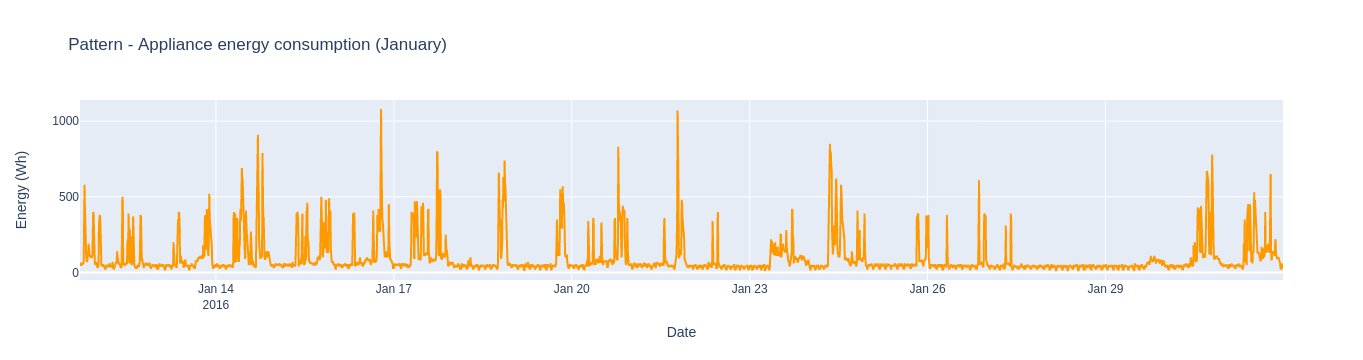

In [35]:
# To understand the timeseries variation of the applaince energy consumption
visData1_tmp = go.Scatter(
    x = tmp_data_month.date,
    y = tmp_data_month.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_monthly
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption ({:})".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_tmp],layout=layout)

iplot(fig)

In [36]:
print ("********************\n{:} Statistics\n********************".format(tmp_month_name))

print ("\n) Out of \"{:}\" total records:".format(tmp_length))
for tmp_i in tmp_data_month_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("  - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_min = tmp_data_month.Appliances.min()
tmp_data_month_max = tmp_data_month.Appliances.max()
tmp_data_month_avg = int(tmp_data_month.Appliances.mean())

print (
    "\n) Above graph stats show that:\n",
    " - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_min),
    " - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_max),
    " - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_avg),
)
# print (tmp_data_month_counts)

********************
January Statistics
********************

) Out of "2922" total records:
  - "659 records" of "40 Wh" energy consumption
  - "638 records" of "50 Wh" energy consumption
  - "229 records" of "30 Wh" energy consumption
  - "220 records" of "60 Wh" energy consumption
  - "181 records" of "20 Wh" energy consumption
  - "117 records" of "80 Wh" energy consumption
  - "116 records" of "70 Wh" energy consumption
  - "88 records" of "90 Wh" energy consumption
  - "77 records" of "100 Wh" energy consumption
  - "66 records" of "110 Wh" energy consumption

) Above graph stats show that:
  - "10 Wh" is the minimum energy consumption
  - "1080 Wh" is the maximum energy consumption
  - "97 Wh" is the average energy consumption



In [37]:
monthwise_stats

Empty DataFrame
Columns: [month, minimum, maximum, average]
Index: []

In [38]:
monthwise_stats.loc[len(monthwise_stats.index)] = [tmp_month_name, tmp_data_month_min, tmp_data_month_max, tmp_data_month_avg]

In [39]:
monthwise_stats

month  minimum  maximum  average
0  January       10     1080       97

## February visualization

In [40]:
tmp_data_month = data1_02_feb.copy(deep=True)
tmp_data_month_counts = tmp_data_month.Appliances.value_counts().sort_values(ascending=False)
tmp_length = len(tmp_data_month)
tmp_month_name = calendar.month_name[tmp_data_month["date"].dt.month[0]]

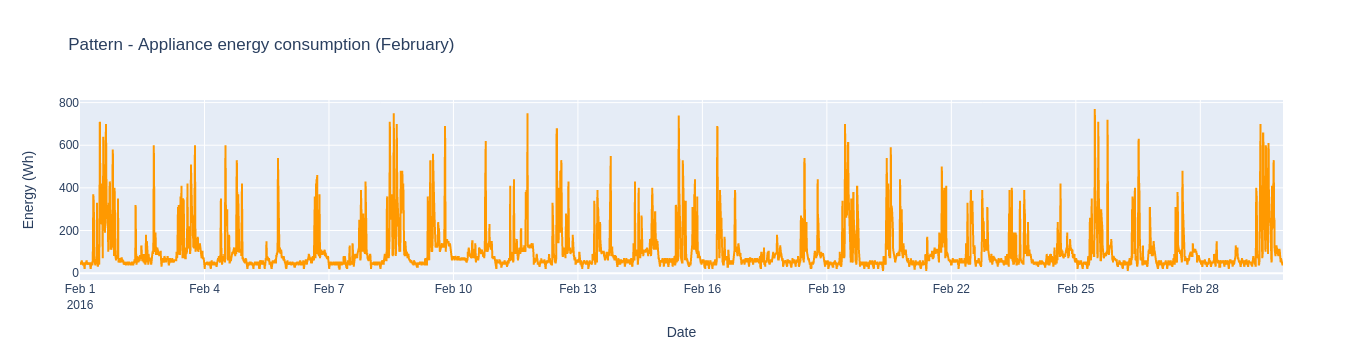

In [41]:
# To understand the timeseries variation of the applaince energy consumption
visData1_tmp = go.Scatter(
    x = tmp_data_month.date,
    y = tmp_data_month.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_monthly
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption ({:})".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_tmp],layout=layout)

iplot(fig)

In [42]:
print ("********************\n{:} Statistics\n********************".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]))

print ("\n) Out of \"{:}\" total records:".format(tmp_length))
for tmp_i in tmp_data_month_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("  - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_min = tmp_data_month.Appliances.min()
tmp_data_month_max = tmp_data_month.Appliances.max()
tmp_data_month_avg = int(tmp_data_month.Appliances.mean())

print (
    "\n) Above graph stats show that:\n",
    " - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_min),
    " - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_max),
    " - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_avg),
)
# print (tmp_data_month_counts)

********************
February Statistics
********************

) Out of "4176" total records:
  - "847 records" of "50 Wh" energy consumption
  - "579 records" of "60 Wh" energy consumption
  - "511 records" of "40 Wh" energy consumption
  - "348 records" of "70 Wh" energy consumption
  - "250 records" of "80 Wh" energy consumption
  - "238 records" of "100 Wh" energy consumption
  - "225 records" of "90 Wh" energy consumption
  - "151 records" of "30 Wh" energy consumption
  - "141 records" of "110 Wh" energy consumption
  - "112 records" of "120 Wh" energy consumption
  - "63 records" of "20 Wh" energy consumption
  - "62 records" of "130 Wh" energy consumption

) Above graph stats show that:
  - "10 Wh" is the minimum energy consumption
  - "770 Wh" is the maximum energy consumption
  - "100 Wh" is the average energy consumption



In [43]:
monthwise_stats

month  minimum  maximum  average
0  January       10     1080       97

In [44]:
monthwise_stats.loc[len(monthwise_stats.index)] = [tmp_month_name, tmp_data_month_min, tmp_data_month_max, tmp_data_month_avg]

In [45]:
monthwise_stats

month  minimum  maximum  average
0   January       10     1080       97
1  February       10      770      100

## March visualization

In [46]:
tmp_data_month = data1_03_mar.copy(deep=True)
tmp_data_month_counts = tmp_data_month.Appliances.value_counts().sort_values(ascending=False)
tmp_length = len(tmp_data_month)
tmp_month_name = calendar.month_name[tmp_data_month["date"].dt.month[0]]

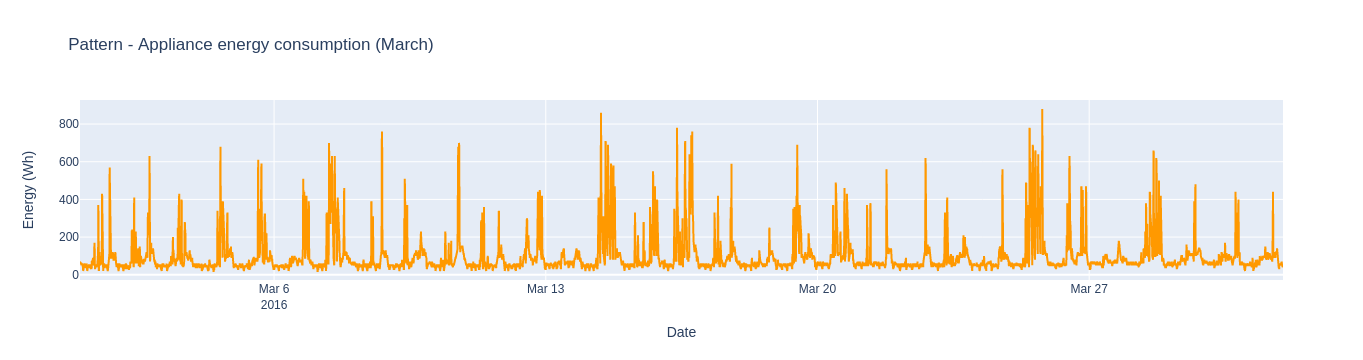

In [47]:
# To understand the timeseries variation of the applaince energy consumption
visData1_tmp = go.Scatter(
    x = tmp_data_month.date,
    y = tmp_data_month.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_monthly
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption ({:})".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_tmp],layout=layout)

iplot(fig)

In [48]:
print ("********************\n{:} Statistics\n********************".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]))

print ("\n) Out of \"{:}\" total records:".format(tmp_length))
for tmp_i in tmp_data_month_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("  - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_min = tmp_data_month.Appliances.min()
tmp_data_month_max = tmp_data_month.Appliances.max()
tmp_data_month_avg = int(tmp_data_month.Appliances.mean())

print (
    "\n) Above graph stats show that:\n",
    " - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_min),
    " - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_max),
    " - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_avg),
)
# print (tmp_data_month_counts)

********************
March Statistics
********************

) Out of "4464" total records:
  - "996 records" of "50 Wh" energy consumption
  - "685 records" of "60 Wh" energy consumption
  - "422 records" of "40 Wh" energy consumption
  - "336 records" of "70 Wh" energy consumption
  - "278 records" of "80 Wh" energy consumption
  - "257 records" of "90 Wh" energy consumption
  - "238 records" of "100 Wh" energy consumption
  - "197 records" of "30 Wh" energy consumption
  - "180 records" of "110 Wh" energy consumption
  - "119 records" of "120 Wh" energy consumption
  - "93 records" of "130 Wh" energy consumption
  - "78 records" of "140 Wh" energy consumption
  - "64 records" of "20 Wh" energy consumption

) Above graph stats show that:
  - "20 Wh" is the minimum energy consumption
  - "880 Wh" is the maximum energy consumption
  - "96 Wh" is the average energy consumption



In [49]:
monthwise_stats

month  minimum  maximum  average
0   January       10     1080       97
1  February       10      770      100

In [50]:
monthwise_stats.loc[len(monthwise_stats.index)] = [tmp_month_name, tmp_data_month_min, tmp_data_month_max, tmp_data_month_avg]

In [51]:
monthwise_stats

month  minimum  maximum  average
0   January       10     1080       97
1  February       10      770      100
2     March       20      880       96

## April visualization

In [52]:
tmp_data_month = data1_04_apr.copy(deep=True)
tmp_data_month_counts = tmp_data_month.Appliances.value_counts().sort_values(ascending=False)
tmp_length = len(tmp_data_month)
tmp_month_name = calendar.month_name[tmp_data_month["date"].dt.month[0]]

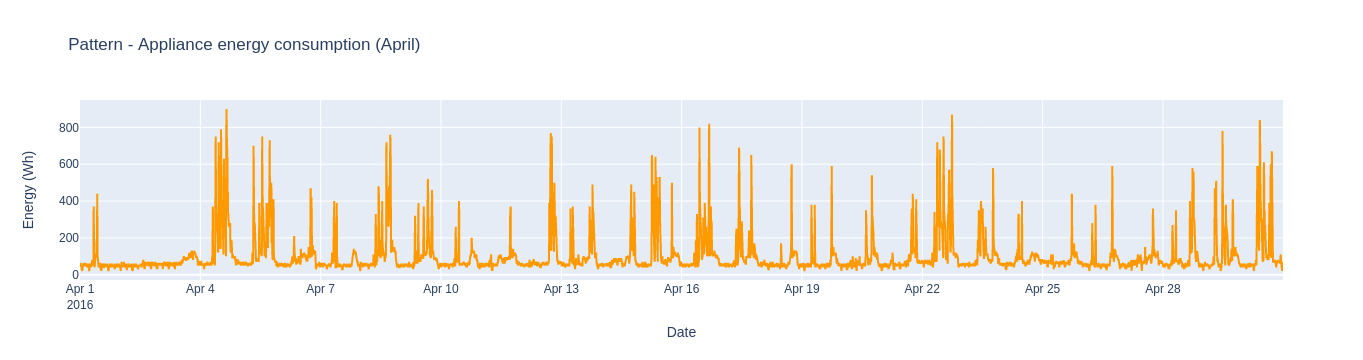

In [53]:
# To understand the timeseries variation of the applaince energy consumption
visData1_tmp = go.Scatter(
    x = tmp_data_month.date,
    y = tmp_data_month.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_monthly
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption ({:})".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_tmp],layout=layout)

iplot(fig)

In [54]:
print ("********************\n{:} Statistics\n********************".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]))

print ("\n) Out of \"{:}\" total records:".format(tmp_length))
for tmp_i in tmp_data_month_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("  - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_min = tmp_data_month.Appliances.min()
tmp_data_month_max = tmp_data_month.Appliances.max()
tmp_data_month_avg = int(tmp_data_month.Appliances.mean())

print (
    "\n) Above graph stats show that:\n",
    " - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_min),
    " - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_max),
    " - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_avg),
)
# print (tmp_data_month_counts)

********************
April Statistics
********************

) Out of "4320" total records:
  - "1004 records" of "50 Wh" energy consumption
  - "904 records" of "60 Wh" energy consumption
  - "408 records" of "70 Wh" energy consumption
  - "274 records" of "40 Wh" energy consumption
  - "254 records" of "80 Wh" energy consumption
  - "228 records" of "90 Wh" energy consumption
  - "213 records" of "100 Wh" energy consumption
  - "170 records" of "110 Wh" energy consumption
  - "123 records" of "120 Wh" energy consumption
  - "111 records" of "30 Wh" energy consumption
  - "69 records" of "130 Wh" energy consumption

) Above graph stats show that:
  - "20 Wh" is the minimum energy consumption
  - "900 Wh" is the maximum energy consumption
  - "98 Wh" is the average energy consumption



In [55]:
monthwise_stats

month  minimum  maximum  average
0   January       10     1080       97
1  February       10      770      100
2     March       20      880       96

In [56]:
monthwise_stats.loc[len(monthwise_stats.index)] = [tmp_month_name, tmp_data_month_min, tmp_data_month_max, tmp_data_month_avg]

In [57]:
monthwise_stats

month  minimum  maximum  average
0   January       10     1080       97
1  February       10      770      100
2     March       20      880       96
3     April       20      900       98

## May visualization

In [58]:
tmp_data_month = data1_05_may.copy(deep=True)
tmp_data_month_counts = tmp_data_month.Appliances.value_counts().sort_values(ascending=False)
tmp_length = len(tmp_data_month)
tmp_month_name = calendar.month_name[tmp_data_month["date"].dt.month[0]]

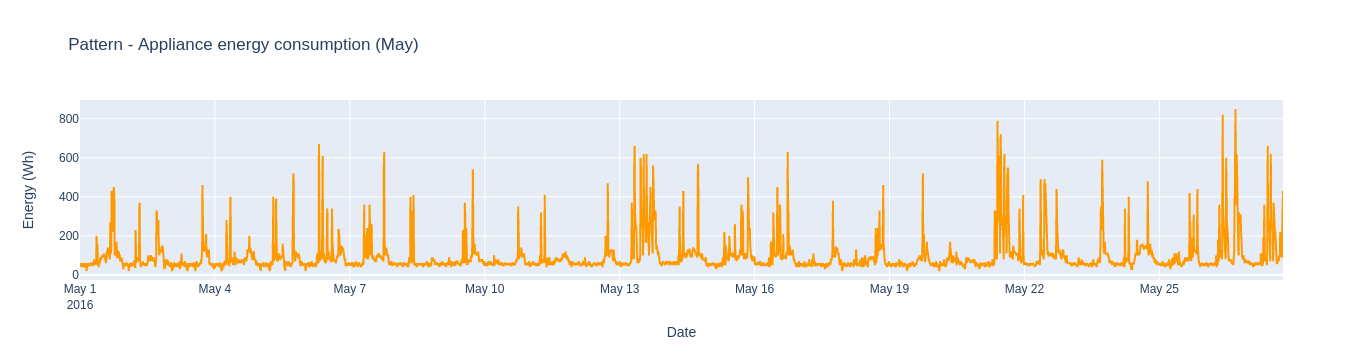

In [59]:
# To understand the timeseries variation of the applaince energy consumption
visData1_tmp = go.Scatter(
    x = tmp_data_month.date,
    y = tmp_data_month.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_monthly
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption ({:})".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_tmp],layout=layout)

iplot(fig)

In [60]:
print ("********************\n{:} Statistics\n********************".format(calendar.month_name[tmp_data_month["date"].dt.month[0]]))

print ("\n) Out of \"{:}\" total records:".format(tmp_length))
for tmp_i in tmp_data_month_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("  - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_min = tmp_data_month.Appliances.min()
tmp_data_month_max = tmp_data_month.Appliances.max()
tmp_data_month_avg = int(tmp_data_month.Appliances.mean())

print (
    "\n) Above graph stats show that:\n",
    " - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_min),
    " - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_max),
    " - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_avg),
)
# print (tmp_data_month_counts)

********************
May Statistics
********************

) Out of "3853" total records:
  - "894 records" of "60 Wh" energy consumption
  - "883 records" of "50 Wh" energy consumption
  - "352 records" of "70 Wh" energy consumption
  - "306 records" of "80 Wh" energy consumption
  - "217 records" of "90 Wh" energy consumption
  - "212 records" of "100 Wh" energy consumption
  - "179 records" of "110 Wh" energy consumption
  - "153 records" of "40 Wh" energy consumption
  - "106 records" of "120 Wh" energy consumption
  - "66 records" of "130 Wh" energy consumption

) Above graph stats show that:
  - "20 Wh" is the minimum energy consumption
  - "850 Wh" is the maximum energy consumption
  - "94 Wh" is the average energy consumption



In [61]:
monthwise_stats

month  minimum  maximum  average
0   January       10     1080       97
1  February       10      770      100
2     March       20      880       96
3     April       20      900       98

In [62]:
monthwise_stats.loc[len(monthwise_stats.index)] = [tmp_month_name, tmp_data_month_min, tmp_data_month_max, tmp_data_month_avg]

In [63]:
monthwise_stats

month  minimum  maximum  average
0   January       10     1080       97
1  February       10      770      100
2     March       20      880       96
3     April       20      900       98
4       May       20      850       94

## Setting up weekly data

In [64]:
monthwise_weekly_weekday_weekend_stats = pd.DataFrame(
    columns=[
        "month",
        "weekday_min", "weekday_max", "weekday_avg",
        "weekend_min", "weekend_max", "weekend_avg"
    ]
)

### Januray weekly

In [65]:
tmp_data_month_weekly = data1_01_jan.copy(deep=True)
tmp_data_month_weekly["WEEKDAY"] = ((pd.to_datetime(tmp_data_month_weekly["date"]).dt.dayofweek)// 5 == 1).astype(float)
tmp_data_month_weekly_counts = tmp_data_month_weekly["WEEKDAY"].value_counts()

tmp_data_month_weekly_energyweekday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] == 0
].Appliances.value_counts().sort_values(ascending=False)
tmp_data_month_weekly_energyweekendday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] != 0
].Appliances.value_counts().sort_values(ascending=False)

tmp_data_month_weekly_length = len(tmp_data_month_weekly)
tmp_data_month_weekly_name = calendar.month_name[tmp_data_month_weekly["date"].dt.month[0]]

print ("\"{:}\" Statistic\n - total records: {:}\n - week-days: {:}\n - weekend-days: {:}\n".format(
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_length,
    tmp_data_month_weekly_counts[0],
    tmp_data_month_weekly_counts[1]
))

print ("\n) Weekday Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[0]))
for tmp_i in tmp_data_month_weekly_energyweekday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.min()
tmp_data_month_weekly_energyweekday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.max()
tmp_data_month_weekly_energyweekday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "   - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekday_min),
    "   - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekday_max),
    "   - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekday_avg),
)


print ("\n) Weekend Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[1]))
for tmp_i in tmp_data_month_weekly_energyweekendday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekendday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.min()
tmp_data_month_weekly_energyweekendday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.max()
tmp_data_month_weekly_energyweekendday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "    - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_min),
    "    - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_max),
    "    - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekendday_avg),
)

"January" Statistic
 - total records: 2922
 - week-days: 2058
 - weekend-days: 864


) Weekday Statistics
  - Out of "2058" total records:
    - "542 records" of "40 Wh" energy consumption
    - "506 records" of "50 Wh" energy consumption
    - "182 records" of "30 Wh" energy consumption
    - "168 records" of "60 Wh" energy consumption
    - "151 records" of "20 Wh" energy consumption
    - "71 records" of "70 Wh" energy consumption
    - "67 records" of "80 Wh" energy consumption
  - Above graph stats show that:
    - "10 Wh" is the minimum energy consumption
    - "1070 Wh" is the maximum energy consumption
    - "83 Wh" is the average energy consumption


) Weekend Statistics
  - Out of "864" total records:
    - "132 records" of "50 Wh" energy consumption
    - "117 records" of "40 Wh" energy consumption
    - "52 records" of "60 Wh" energy consumption
    - "52 records" of "90 Wh" energy consumption
    - "50 records" of "80 Wh" energy consumption
  - Above graph stats show that:

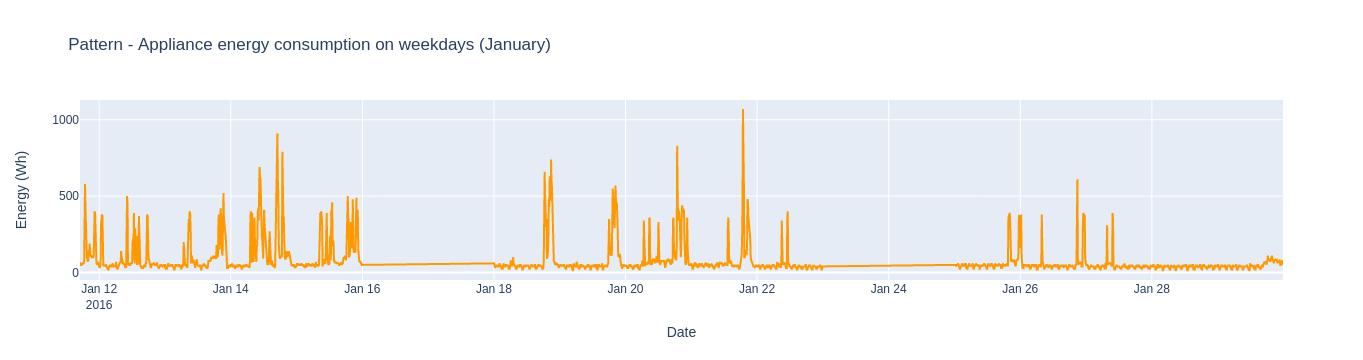

In [66]:
# Find rows with weekday 
tmp_data_month_weekly_weekdays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekdays_tmp = go.Scatter(
    x = tmp_data_month_weekly_weekdays.date,
    y = tmp_data_month_weekly_weekdays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekdays
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption on weekdays ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_weekdays_tmp],layout=layout)

iplot(fig)

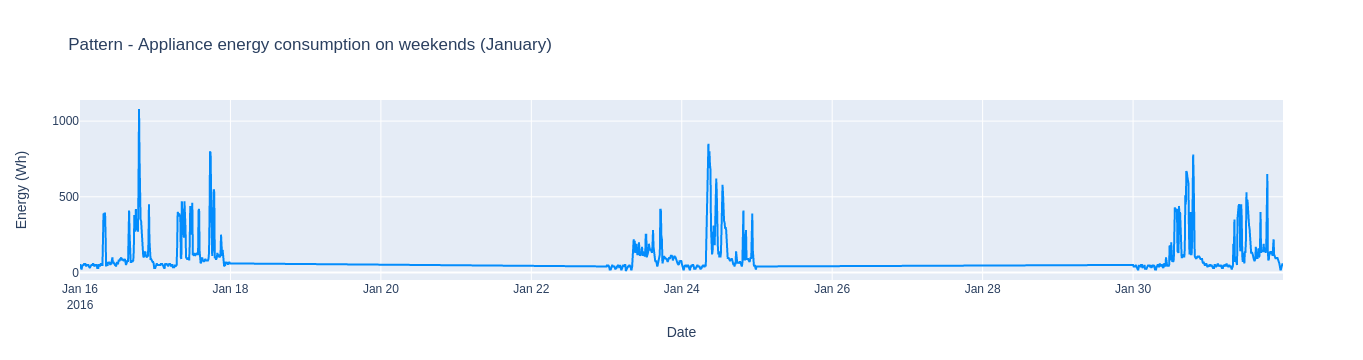

In [67]:
# Find rows with weekday 
tmp_data_month_weekly_weekenddays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekenddays_tmp = go.Scatter(
    x = tmp_data_month_weekly_weekenddays.date,
    y = tmp_data_month_weekly_weekenddays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekends
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption on weekends ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_weekenddays_tmp],layout=layout)

iplot(fig)

In [68]:
monthwise_weekly_weekday_weekend_stats

Empty DataFrame
Columns: [month, weekday_min, weekday_max, weekday_avg, weekend_min, weekend_max, weekend_avg]
Index: []

In [69]:
monthwise_weekly_weekday_weekend_stats.loc[len(monthwise_weekly_weekday_weekend_stats.index)] = [
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_energyweekday_min, tmp_data_month_weekly_energyweekday_max,
    tmp_data_month_weekly_energyweekday_avg,
    tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekendday_max,
    tmp_data_month_weekly_energyweekendday_avg
]

In [70]:
monthwise_weekly_weekday_weekend_stats

month  weekday_min  weekday_max  weekday_avg  weekend_min  weekend_max  \
0  January           10         1070           83           10         1080   

   weekend_avg  
0          128

### February weekly

In [71]:
tmp_data_month_weekly = data1_02_feb.copy(deep=True)
tmp_data_month_weekly["WEEKDAY"] = ((pd.to_datetime(tmp_data_month_weekly["date"]).dt.dayofweek)// 5 == 1).astype(float)
tmp_data_month_weekly_counts = tmp_data_month_weekly["WEEKDAY"].value_counts()

tmp_data_month_weekly_energyweekday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] == 0
].Appliances.value_counts().sort_values(ascending=False)
tmp_data_month_weekly_energyweekendday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] != 0
].Appliances.value_counts().sort_values(ascending=False)

tmp_data_month_weekly_length = len(tmp_data_month_weekly)
tmp_data_month_weekly_name = calendar.month_name[tmp_data_month_weekly["date"].dt.month[0]]

print ("\"{:}\" Statistic\n - total records: {:}\n - week-days: {:}\n - weekend-days: {:}\n".format(
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_length,
    tmp_data_month_weekly_counts[0],
    tmp_data_month_weekly_counts[1]
))

print ("\n) Weekday Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[0]))
for tmp_i in tmp_data_month_weekly_energyweekday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.min()
tmp_data_month_weekly_energyweekday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.max()
tmp_data_month_weekly_energyweekday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "   - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekday_min),
    "   - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekday_max),
    "   - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekday_avg),
)


print ("\n) Weekend Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[1]))
for tmp_i in tmp_data_month_weekly_energyweekendday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekendday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.min()
tmp_data_month_weekly_energyweekendday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.max()
tmp_data_month_weekly_energyweekendday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "    - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_min),
    "    - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_max),
    "    - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekendday_avg),
)

"February" Statistic
 - total records: 4176
 - week-days: 3024
 - weekend-days: 1152


) Weekday Statistics
  - Out of "3024" total records:
    - "588 records" of "50 Wh" energy consumption
    - "427 records" of "60 Wh" energy consumption
    - "351 records" of "40 Wh" energy consumption
    - "271 records" of "70 Wh" energy consumption
    - "178 records" of "80 Wh" energy consumption
    - "152 records" of "90 Wh" energy consumption
    - "147 records" of "100 Wh" energy consumption
    - "99 records" of "110 Wh" energy consumption
    - "97 records" of "30 Wh" energy consumption
    - "92 records" of "120 Wh" energy consumption
    - "52 records" of "130 Wh" energy consumption
  - Above graph stats show that:
    - "10 Wh" is the minimum energy consumption
    - "770 Wh" is the maximum energy consumption
    - "106 Wh" is the average energy consumption


) Weekend Statistics
  - Out of "1152" total records:
    - "259 records" of "50 Wh" energy consumption
    - "160 records" of "

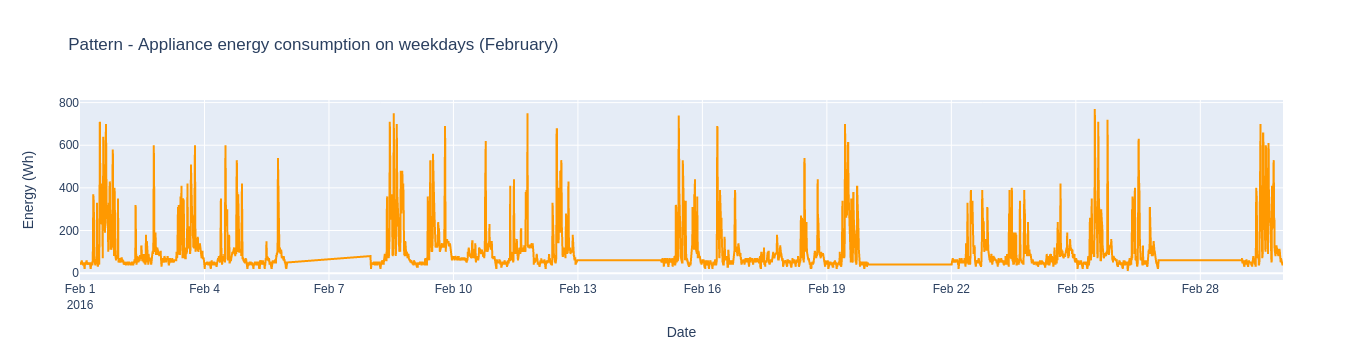

In [72]:
# Find rows with weekday 
tmp_data_month_weekly_weekdays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekdays_tmp = go.Scatter(
    x = tmp_data_month_weekly_weekdays.date,
    y = tmp_data_month_weekly_weekdays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekdays
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption on weekdays ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_weekdays_tmp],layout=layout)

iplot(fig)

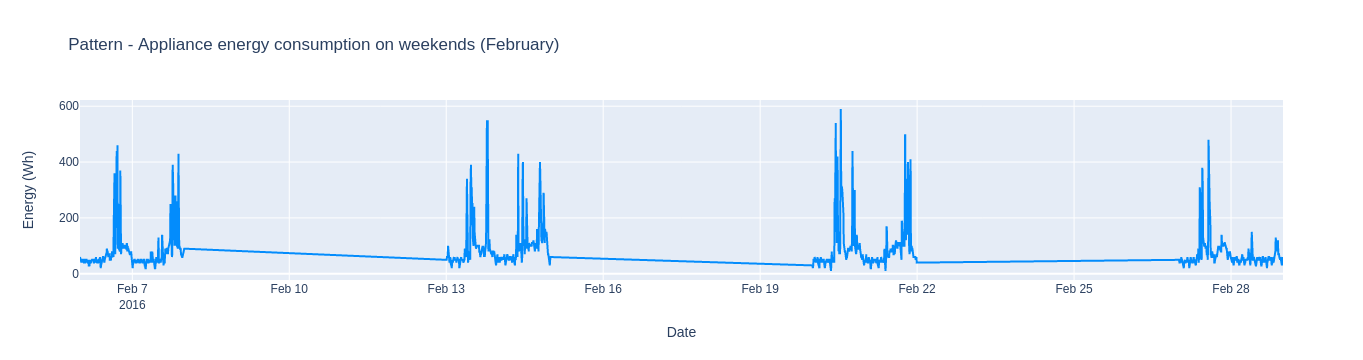

In [73]:
# Find rows with weekday 
tmp_data_month_weekly_weekenddays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekenddays_tmp = go.Scatter(
    x = tmp_data_month_weekly_weekenddays.date,
    y = tmp_data_month_weekly_weekenddays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekends
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption on weekends ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_weekenddays_tmp],layout=layout)

iplot(fig)

In [74]:
monthwise_weekly_weekday_weekend_stats

month  weekday_min  weekday_max  weekday_avg  weekend_min  weekend_max  \
0  January           10         1070           83           10         1080   

   weekend_avg  
0          128

In [75]:
monthwise_weekly_weekday_weekend_stats.loc[len(monthwise_weekly_weekday_weekend_stats.index)] = [
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_energyweekday_min, tmp_data_month_weekly_energyweekday_max,
    tmp_data_month_weekly_energyweekday_avg,
    tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekendday_max,
    tmp_data_month_weekly_energyweekendday_avg
]

In [76]:
monthwise_weekly_weekday_weekend_stats

month  weekday_min  weekday_max  weekday_avg  weekend_min  weekend_max  \
0   January           10         1070           83           10         1080   
1  February           10          770          106           10          590   

   weekend_avg  
0          128  
1           85

### March weekly

In [77]:
tmp_data_month_weekly = data1_03_mar.copy(deep=True)
tmp_data_month_weekly["WEEKDAY"] = ((pd.to_datetime(tmp_data_month_weekly["date"]).dt.dayofweek)// 5 == 1).astype(float)
tmp_data_month_weekly_counts = tmp_data_month_weekly["WEEKDAY"].value_counts()

tmp_data_month_weekly_energyweekday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] == 0
].Appliances.value_counts().sort_values(ascending=False)
tmp_data_month_weekly_energyweekendday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] != 0
].Appliances.value_counts().sort_values(ascending=False)

tmp_data_month_weekly_length = len(tmp_data_month_weekly)
tmp_data_month_weekly_name = calendar.month_name[tmp_data_month_weekly["date"].dt.month[0]]

print ("\"{:}\" Statistic\n - total records: {:}\n - week-days: {:}\n - weekend-days: {:}\n".format(
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_length,
    tmp_data_month_weekly_counts[0],
    tmp_data_month_weekly_counts[1]
))

print ("\n) Weekday Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[0]))
for tmp_i in tmp_data_month_weekly_energyweekday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.min()
tmp_data_month_weekly_energyweekday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.max()
tmp_data_month_weekly_energyweekday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "   - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekday_min),
    "   - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekday_max),
    "   - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekday_avg),
)


print ("\n) Weekend Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[1]))
for tmp_i in tmp_data_month_weekly_energyweekendday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekendday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.min()
tmp_data_month_weekly_energyweekendday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.max()
tmp_data_month_weekly_energyweekendday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "    - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_min),
    "    - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_max),
    "    - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekendday_avg),
)

"March" Statistic
 - total records: 4464
 - week-days: 3312
 - weekend-days: 1152


) Weekday Statistics
  - Out of "3312" total records:
    - "781 records" of "50 Wh" energy consumption
    - "501 records" of "60 Wh" energy consumption
    - "322 records" of "40 Wh" energy consumption
    - "227 records" of "70 Wh" energy consumption
    - "189 records" of "90 Wh" energy consumption
    - "179 records" of "80 Wh" energy consumption
    - "169 records" of "100 Wh" energy consumption
    - "149 records" of "30 Wh" energy consumption
    - "135 records" of "110 Wh" energy consumption
    - "85 records" of "120 Wh" energy consumption
    - "68 records" of "130 Wh" energy consumption
    - "55 records" of "20 Wh" energy consumption
    - "54 records" of "140 Wh" energy consumption
  - Above graph stats show that:
    - "20 Wh" is the minimum energy consumption
    - "880 Wh" is the maximum energy consumption
    - "97 Wh" is the average energy consumption


) Weekend Statistics
  - Out of

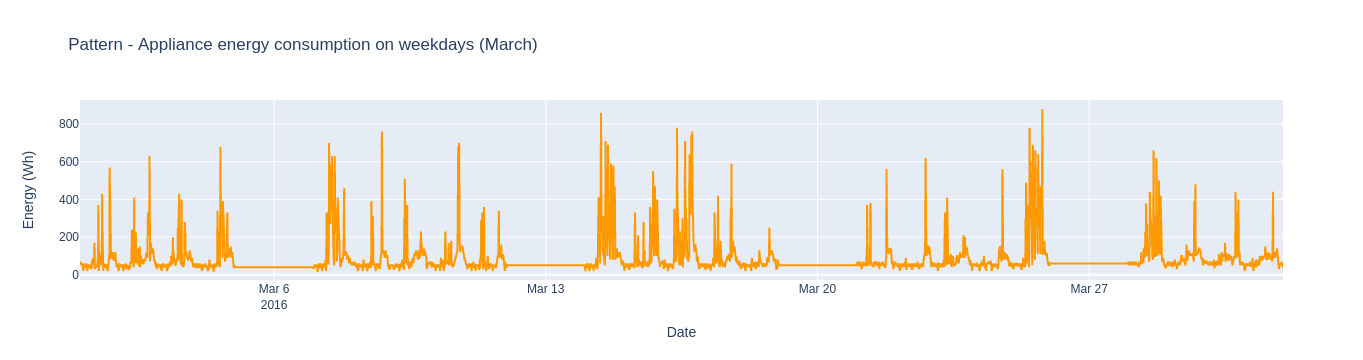

In [78]:
# Find rows with weekday 
tmp_data_month_weekly_weekdays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekdays_tmp = go.Scatter(
    x = tmp_data_month_weekly_weekdays.date,
    y = tmp_data_month_weekly_weekdays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekdays
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption on weekdays ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_weekdays_tmp],layout=layout)

iplot(fig)

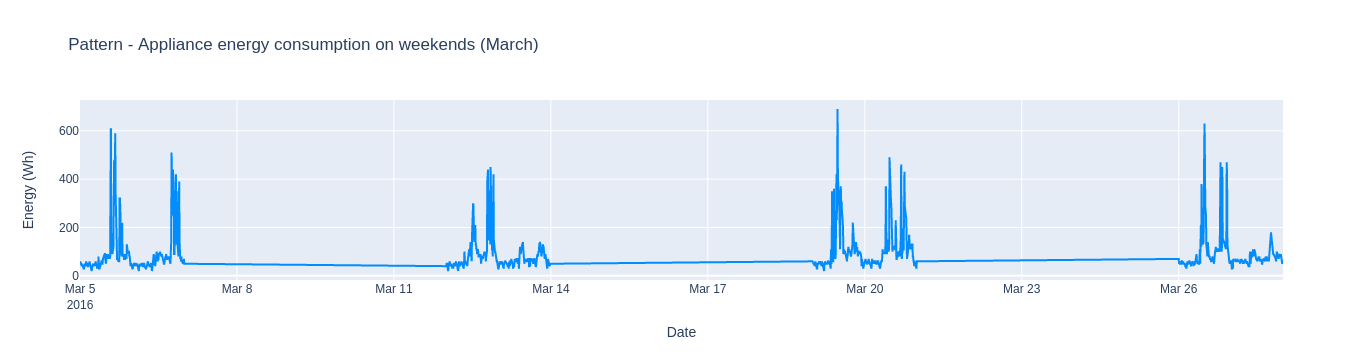

In [79]:
# Find rows with weekday 
tmp_data_month_weekly_weekenddays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekenddays_tmp = go.Scatter(
    x = tmp_data_month_weekly_weekenddays.date,
    y = tmp_data_month_weekly_weekenddays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekends
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption on weekends ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_weekenddays_tmp],layout=layout)

iplot(fig)

In [80]:
monthwise_weekly_weekday_weekend_stats

month  weekday_min  weekday_max  weekday_avg  weekend_min  weekend_max  \
0   January           10         1070           83           10         1080   
1  February           10          770          106           10          590   

   weekend_avg  
0          128  
1           85

In [81]:
monthwise_weekly_weekday_weekend_stats.loc[len(monthwise_weekly_weekday_weekend_stats.index)] = [
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_energyweekday_min, tmp_data_month_weekly_energyweekday_max,
    tmp_data_month_weekly_energyweekday_avg,
    tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekendday_max,
    tmp_data_month_weekly_energyweekendday_avg
]

In [82]:
monthwise_weekly_weekday_weekend_stats

month  weekday_min  weekday_max  weekday_avg  weekend_min  weekend_max  \
0   January           10         1070           83           10         1080   
1  February           10          770          106           10          590   
2     March           20          880           97           20          690   

   weekend_avg  
0          128  
1           85  
2           94

### April weekly

In [83]:
tmp_data_month_weekly = data1_04_apr.copy(deep=True)
tmp_data_month_weekly["WEEKDAY"] = ((pd.to_datetime(tmp_data_month_weekly["date"]).dt.dayofweek)// 5 == 1).astype(float)
tmp_data_month_weekly_counts = tmp_data_month_weekly["WEEKDAY"].value_counts()

tmp_data_month_weekly_energyweekday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] == 0
].Appliances.value_counts().sort_values(ascending=False)
tmp_data_month_weekly_energyweekendday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] != 0
].Appliances.value_counts().sort_values(ascending=False)

tmp_data_month_weekly_length = len(tmp_data_month_weekly)
tmp_data_month_weekly_name = calendar.month_name[tmp_data_month_weekly["date"].dt.month[0]]

print ("\"{:}\" Statistic\n - total records: {:}\n - week-days: {:}\n - weekend-days: {:}\n".format(
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_length,
    tmp_data_month_weekly_counts[0],
    tmp_data_month_weekly_counts[1]
))

print ("\n) Weekday Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[0]))
for tmp_i in tmp_data_month_weekly_energyweekday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.min()
tmp_data_month_weekly_energyweekday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.max()
tmp_data_month_weekly_energyweekday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "   - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekday_min),
    "   - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekday_max),
    "   - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekday_avg),
)


print ("\n) Weekend Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[1]))
for tmp_i in tmp_data_month_weekly_energyweekendday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekendday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.min()
tmp_data_month_weekly_energyweekendday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.max()
tmp_data_month_weekly_energyweekendday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "    - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_min),
    "    - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_max),
    "    - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekendday_avg),
)

"April" Statistic
 - total records: 4320
 - week-days: 3024
 - weekend-days: 1296


) Weekday Statistics
  - Out of "3024" total records:
    - "707 records" of "50 Wh" energy consumption
    - "636 records" of "60 Wh" energy consumption
    - "299 records" of "70 Wh" energy consumption
    - "197 records" of "40 Wh" energy consumption
    - "170 records" of "80 Wh" energy consumption
    - "150 records" of "90 Wh" energy consumption
    - "139 records" of "100 Wh" energy consumption
    - "103 records" of "110 Wh" energy consumption
    - "82 records" of "30 Wh" energy consumption
    - "81 records" of "120 Wh" energy consumption
    - "53 records" of "130 Wh" energy consumption
  - Above graph stats show that:
    - "20 Wh" is the minimum energy consumption
    - "900 Wh" is the maximum energy consumption
    - "99 Wh" is the average energy consumption


) Weekend Statistics
  - Out of "1296" total records:
    - "297 records" of "50 Wh" energy consumption
    - "268 records" of "60 

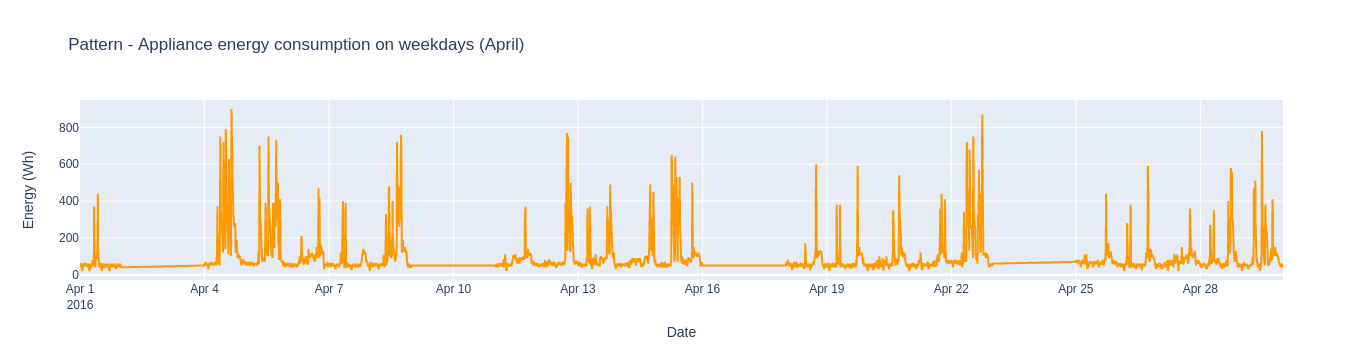

In [84]:
# Find rows with weekday 
tmp_data_month_weekly_weekdays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekdays_tmp = go.Scatter(
    x = tmp_data_month_weekly_weekdays.date,
    y = tmp_data_month_weekly_weekdays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekdays
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption on weekdays ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_weekdays_tmp],layout=layout)

iplot(fig)

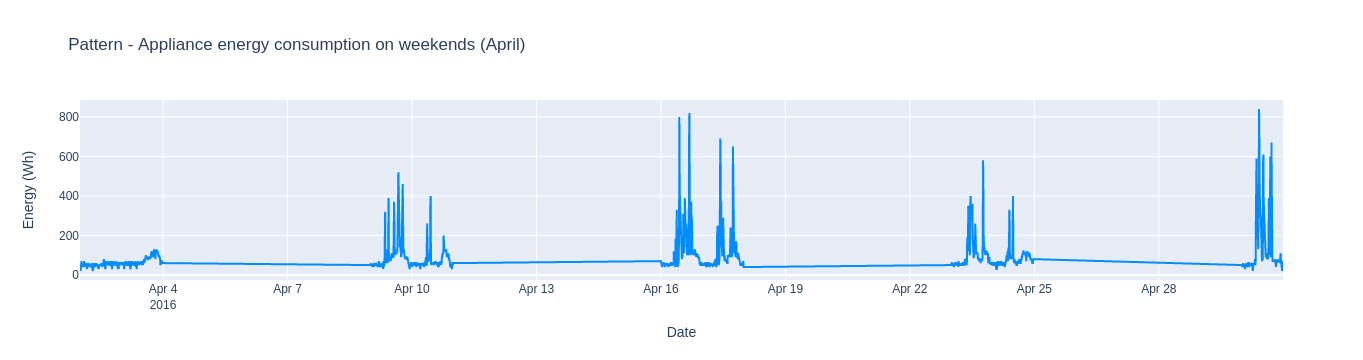

In [85]:
# Find rows with weekday 
tmp_data_month_weekly_weekenddays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekenddays_tmp = go.Scatter(
    x = tmp_data_month_weekly_weekenddays.date,
    y = tmp_data_month_weekly_weekenddays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekends
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption on weekends ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_weekenddays_tmp],layout=layout)

iplot(fig)

In [86]:
monthwise_weekly_weekday_weekend_stats

month  weekday_min  weekday_max  weekday_avg  weekend_min  weekend_max  \
0   January           10         1070           83           10         1080   
1  February           10          770          106           10          590   
2     March           20          880           97           20          690   

   weekend_avg  
0          128  
1           85  
2           94

In [87]:
monthwise_weekly_weekday_weekend_stats.loc[len(monthwise_weekly_weekday_weekend_stats.index)] = [
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_energyweekday_min, tmp_data_month_weekly_energyweekday_max,
    tmp_data_month_weekly_energyweekday_avg,
    tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekendday_max,
    tmp_data_month_weekly_energyweekendday_avg
]

In [88]:
monthwise_weekly_weekday_weekend_stats

month  weekday_min  weekday_max  weekday_avg  weekend_min  weekend_max  \
0   January           10         1070           83           10         1080   
1  February           10          770          106           10          590   
2     March           20          880           97           20          690   
3     April           20          900           99           20          840   

   weekend_avg  
0          128  
1           85  
2           94  
3           96

### May weekly

In [89]:
tmp_data_month_weekly = data1_05_may.copy(deep=True)
tmp_data_month_weekly["WEEKDAY"] = ((pd.to_datetime(tmp_data_month_weekly["date"]).dt.dayofweek)// 5 == 1).astype(float)
tmp_data_month_weekly_counts = tmp_data_month_weekly["WEEKDAY"].value_counts()

tmp_data_month_weekly_energyweekday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] == 0
].Appliances.value_counts().sort_values(ascending=False)
tmp_data_month_weekly_energyweekendday_counts = tmp_data_month_weekly[
    tmp_data_month_weekly["WEEKDAY"] != 0
].Appliances.value_counts().sort_values(ascending=False)

tmp_data_month_weekly_length = len(tmp_data_month_weekly)
tmp_data_month_weekly_name = calendar.month_name[tmp_data_month_weekly["date"].dt.month[0]]

print ("\"{:}\" Statistic\n - total records: {:}\n - week-days: {:}\n - weekend-days: {:}\n".format(
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_length,
    tmp_data_month_weekly_counts[0],
    tmp_data_month_weekly_counts[1]
))

print ("\n) Weekday Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[0]))
for tmp_i in tmp_data_month_weekly_energyweekday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.min()
tmp_data_month_weekly_energyweekday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.max()
tmp_data_month_weekly_energyweekday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "   - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekday_min),
    "   - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekday_max),
    "   - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekday_avg),
)


print ("\n) Weekend Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[1]))
for tmp_i in tmp_data_month_weekly_energyweekendday_counts.iteritems():
    if (tmp_i[1] < 50):
        break
    print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

tmp_data_month_weekly_energyweekendday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.min()
tmp_data_month_weekly_energyweekendday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.max()
tmp_data_month_weekly_energyweekendday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.mean())

print (
    "  - Above graph stats show that:\n",
    "    - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_min),
    "    - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_max),
    "    - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekendday_avg),
)

"May" Statistic
 - total records: 3853
 - week-days: 2845
 - weekend-days: 1008


) Weekday Statistics
  - Out of "2845" total records:
    - "698 records" of "50 Wh" energy consumption
    - "677 records" of "60 Wh" energy consumption
    - "299 records" of "70 Wh" energy consumption
    - "229 records" of "80 Wh" energy consumption
    - "141 records" of "90 Wh" energy consumption
    - "117 records" of "100 Wh" energy consumption
    - "114 records" of "40 Wh" energy consumption
    - "104 records" of "110 Wh" energy consumption
    - "72 records" of "120 Wh" energy consumption
  - Above graph stats show that:
    - "20 Wh" is the minimum energy consumption
    - "850 Wh" is the maximum energy consumption
    - "90 Wh" is the average energy consumption


) Weekend Statistics
  - Out of "1008" total records:
    - "217 records" of "60 Wh" energy consumption
    - "185 records" of "50 Wh" energy consumption
    - "95 records" of "100 Wh" energy consumption
    - "77 records" of "80 Wh

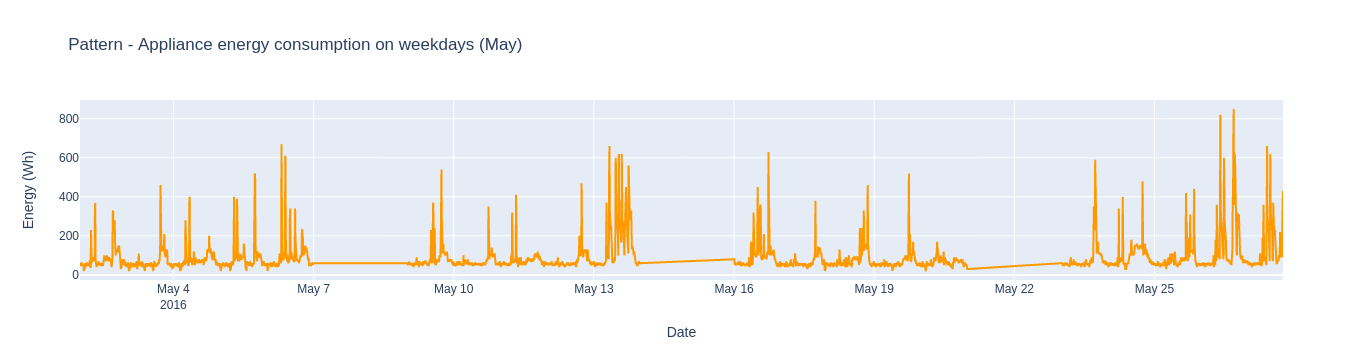

In [90]:
# Find rows with weekday 
tmp_data_month_weekly_weekdays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekdays_tmp = go.Scatter(
    x = tmp_data_month_weekly_weekdays.date,
    y = tmp_data_month_weekly_weekdays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekdays
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption on weekdays ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_weekdays_tmp],layout=layout)

iplot(fig)

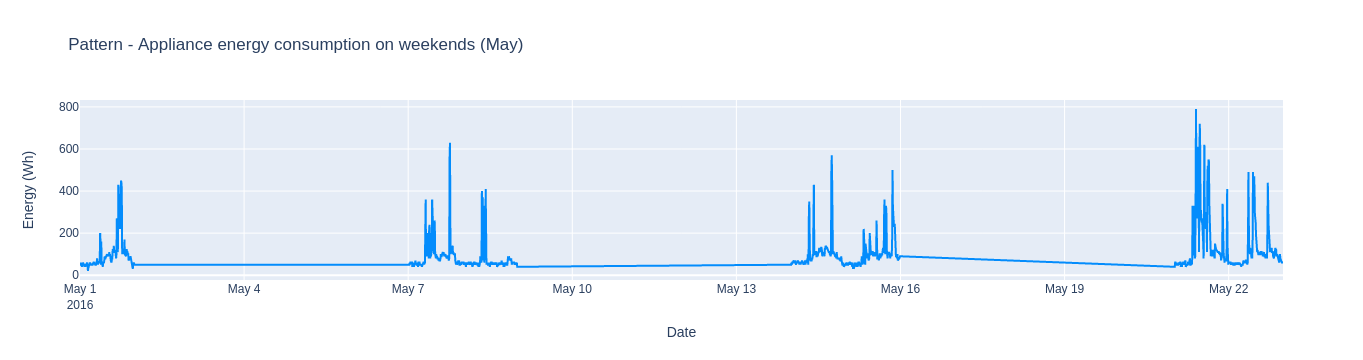

In [91]:
# Find rows with weekday 
tmp_data_month_weekly_weekenddays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0]
# To understand the timeseries variation of the applaince energy consumption
visData1_weekenddays_tmp = go.Scatter(
    x = tmp_data_month_weekly_weekenddays.date,
    y = tmp_data_month_weekly_weekenddays.Appliances,
    mode = "lines",
    line_color=asif_graph_color_theme_weekends
)
layout = go.Layout(
    title = "Pattern - Appliance energy consumption on weekends ({:})".format(tmp_data_month_weekly_name),
    xaxis=dict(title='Date'),
    yaxis=dict(title='Energy (Wh)')
)
fig = go.Figure(data=[visData1_weekenddays_tmp],layout=layout)

iplot(fig)

In [92]:
monthwise_weekly_weekday_weekend_stats

month  weekday_min  weekday_max  weekday_avg  weekend_min  weekend_max  \
0   January           10         1070           83           10         1080   
1  February           10          770          106           10          590   
2     March           20          880           97           20          690   
3     April           20          900           99           20          840   

   weekend_avg  
0          128  
1           85  
2           94  
3           96

In [93]:
monthwise_weekly_weekday_weekend_stats.loc[len(monthwise_weekly_weekday_weekend_stats.index)] = [
    tmp_data_month_weekly_name,
    tmp_data_month_weekly_energyweekday_min, tmp_data_month_weekly_energyweekday_max,
    tmp_data_month_weekly_energyweekday_avg,
    tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekendday_max,
    tmp_data_month_weekly_energyweekendday_avg
]

In [94]:
monthwise_weekly_weekday_weekend_stats

month  weekday_min  weekday_max  weekday_avg  weekend_min  weekend_max  \
0   January           10         1070           83           10         1080   
1  February           10          770          106           10          590   
2     March           20          880           97           20          690   
3     April           20          900           99           20          840   
4       May           20          850           90           20          790   

   weekend_avg  
0          128  
1           85  
2           94  
3           96  
4          105

## Setting up week-by-week data

In [95]:
monthwise_weekbyweek_weekday_stats = pd.DataFrame(
    columns=[
        "month", "week",
        "wk1_min", "wk1_max", "wk1_avg",
        "wk2_min", "wk2_max", "wk2_avg",
        "wk3_min", "wk3_max", "wk3_avg",
        "wk4_min", "wk4_max", "wk4_avg",
        "wk5_min", "wk5_max", "wk5_avg"
    ]
)

monthwise_weekbyweek_weekend_stats = pd.DataFrame(
    columns=[
        "month", "week",
        "wk1_min", "wk1_max", "wk1_avg",
        "wk2_min", "wk2_max", "wk2_avg",
        "wk3_min", "wk3_max", "wk3_avg",
        "wk4_min", "wk4_max", "wk4_avg",
        "wk5_min", "wk5_max", "wk5_avg"
    ]
)

In [96]:
monthwise_weekbyweek_weekday_stats

Empty DataFrame
Columns: [month, week, wk1_min, wk1_max, wk1_avg, wk2_min, wk2_max, wk2_avg, wk3_min, wk3_max, wk3_avg, wk4_min, wk4_max, wk4_avg, wk5_min, wk5_max, wk5_avg]
Index: []

In [97]:
monthwise_weekbyweek_weekend_stats

Empty DataFrame
Columns: [month, week, wk1_min, wk1_max, wk1_avg, wk2_min, wk2_max, wk2_avg, wk3_min, wk3_max, wk3_avg, wk4_min, wk4_max, wk4_avg, wk5_min, wk5_max, wk5_avg]
Index: []

### Januray week by week data

### February week by week data

In [98]:
# tmp_data_month_weekly = data1_02_feb.copy(deep=True)
# tmp_data_month_weekly["WEEKDAY"] = ((pd.to_datetime(tmp_data_month_weekly["date"]).dt.dayofweek)// 5 == 1).astype(float)
# tmp_data_month_weekly_counts = tmp_data_month_weekly["WEEKDAY"].value_counts()

# tmp_data_month_weekly_energyweekday_counts = tmp_data_month_weekly[
#     tmp_data_month_weekly["WEEKDAY"] == 0
# ].Appliances.value_counts().sort_values(ascending=False)
# tmp_data_month_weekly_energyweekendday_counts = tmp_data_month_weekly[
#     tmp_data_month_weekly["WEEKDAY"] != 0
# ].Appliances.value_counts().sort_values(ascending=False)

# tmp_data_month_weekly_length = len(tmp_data_month_weekly)
# tmp_data_month_weekly_name = calendar.month_name[tmp_data_month_weekly["date"].dt.month[0]]

# print ("\"{:}\" Statistic\n - total records: {:}\n - week-days: {:}\n - weekend-days: {:}\n".format(
#     tmp_data_month_weekly_name,
#     tmp_data_month_weekly_length,
#     tmp_data_month_weekly_counts[0],
#     tmp_data_month_weekly_counts[1]
# ))

# print ("\n) Weekday Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[0]))
# for tmp_i in tmp_data_month_weekly_energyweekday_counts.iteritems():
#     if (tmp_i[1] < 50):
#         break
#     print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

# tmp_data_month_weekly_energyweekday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.min()
# tmp_data_month_weekly_energyweekday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.max()
# tmp_data_month_weekly_energyweekday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0].Appliances.mean())

# print (
#     "  - Above graph stats show that:\n",
#     "   - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekday_min),
#     "   - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekday_max),
#     "   - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekday_avg),
# )


# print ("\n) Weekend Statistics\n  - Out of \"{:}\" total records:".format(tmp_data_month_weekly_counts[1]))
# for tmp_i in tmp_data_month_weekly_energyweekendday_counts.iteritems():
#     if (tmp_i[1] < 50):
#         break
#     print ("    - \"{:} records\" of \"{:} Wh\" energy consumption".format(tmp_i[1], tmp_i[0]))

# tmp_data_month_weekly_energyweekendday_min = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.min()
# tmp_data_month_weekly_energyweekendday_max = tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.max()
# tmp_data_month_weekly_energyweekendday_avg = int(tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0].Appliances.mean())

# print (
#     "  - Above graph stats show that:\n",
#     "    - \"{:} Wh\" is the minimum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_min),
#     "    - \"{:} Wh\" is the maximum energy consumption\n".format(tmp_data_month_weekly_energyweekendday_max),
#     "    - \"{:} Wh\" is the average energy consumption\n".format(tmp_data_month_weekly_energyweekendday_avg),
# )

In [99]:
# # Find rows with weekday 
# tmp_data_month_weekly_weekdays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] == 0]
# # To understand the timeseries variation of the applaince energy consumption
# visData1_weekdays_tmp = go.Scatter(
#     x = tmp_data_month_weekly_weekdays.date,
#     y = tmp_data_month_weekly_weekdays.Appliances,
#     mode = "lines",
#     line_color=asif_graph_color_theme_weekdays
# )
# layout = go.Layout(
#     title = "Pattern - Appliance energy consumption on weekdays ({:})".format(tmp_data_month_weekly_name),
#     xaxis=dict(title='Date'),
#     yaxis=dict(title='Energy (Wh)')
# )
# fig = go.Figure(data=[visData1_weekdays_tmp],layout=layout)

# iplot(fig)

In [100]:
# # Find rows with weekday 
# tmp_data_month_weekly_weekenddays =  tmp_data_month_weekly[tmp_data_month_weekly["WEEKDAY"] != 0]
# # To understand the timeseries variation of the applaince energy consumption
# visData1_weekenddays_tmp = go.Scatter(
#     x = tmp_data_month_weekly_weekenddays.date,
#     y = tmp_data_month_weekly_weekenddays.Appliances,
#     mode = "lines",
#     line_color=asif_graph_color_theme_weekends
# )
# layout = go.Layout(
#     title = "Pattern - Appliance energy consumption on weekends ({:})".format(tmp_data_month_weekly_name),
#     xaxis=dict(title='Date'),
#     yaxis=dict(title='Energy (Wh)')
# )
# fig = go.Figure(data=[visData1_weekenddays_tmp],layout=layout)

# iplot(fig)

In [101]:
# monthwise_weekbyweek_weekday_stats

In [102]:
# monthwise_weekbyweek_weekday_stats.loc[len(monthwise_weekbyweek_weekday_stats.index)] = [
#     tmp_data_month_weekly_name,
#     tmp_data_month_weekly_energyweekday_min, tmp_data_month_weekly_energyweekday_max,
#     tmp_data_month_weekly_energyweekday_avg,
#     tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekendday_max,
#     tmp_data_month_weekly_energyweekendday_avg
# ]

In [103]:
# monthwise_weekbyweek_weekday_stats

In [104]:
# monthwise_weekbyweek_weekend_stats

In [105]:
# monthwise_weekbyweek_weekend_stats.loc[len(monthwise_weekbyweek_weekend_stats.index)] = [
#     tmp_data_month_weekly_name,
#     tmp_data_month_weekly_energyweekendday_min, tmp_data_month_weekly_energyweekday_max,
#     tmp_data_month_weekly_energyweekendday_avg,
# ]

# Setting up train/test dataset

## converting/getting dataframe values into an 'numpy array'

In [106]:
print ("Number of columns:", len(data1.columns))

Number of columns: 22


In [107]:
print ("Number of rows:", len(data1))

Number of rows: 19735


In [108]:
values=data1.values

In [109]:
values.shape

(19735, 22)

In [110]:
values[19734][21] #last row and last colum's value

23.2

## scaling the dataset because LSTM can only interpret scalar values (not string/complex datatypes)

In [111]:
# for tmp_i in range(0, len(values)):
#     print (values[tmp_i], "\n")
#     if (tmp_i==3):
#         break

In [112]:
values

array([[ 60.        ,  92.        ,  48.9       , ...,   7.        ,
         19.89      ,  17.16666667],
       [ 60.        ,  92.        ,  48.86333333, ...,   6.66666667,
         19.89      ,  17.16666667],
       [ 50.        ,  92.        ,  48.73      , ...,   6.33333333,
         19.89      ,  17.16666667],
       ...,
       [270.        ,  56.33333333,  49.66      , ...,   3.66666667,
         25.5       ,  23.23      ],
       [420.        ,  56.66666667,  49.51875   , ...,   3.83333333,
         25.5       ,  23.2       ],
       [430.        ,  57.        ,  49.736     , ...,   4.        ,
         25.5       ,  23.2       ]])

In [113]:
len(values)

19735

## A) Scaled by Paper's Approach

In [114]:
# data2 = data1.copy(deep=True)

In [115]:
# data2.head()

In [116]:
# standard_deviation_data2 = data2.std()["Appliances"]
# average_data2 = data2.mean()["Appliances"]
# print ("Standard deviation of appliances: {:}".format(standard_deviation_data2))
# print ("Standard deviation of appliances: {:}".format(average_data2))

### Applying Eq (1) from the reference paper

In [117]:
# print ("Standard deviation:")
# for col in data2.columns:
#     print (" - \"{:.5f}\"\t{:}".format(data2.std()[col], col))

In [118]:
# print ("Average:")
# for col in data2.columns:
#     print (" - \"{:.5f}\"\t{:}".format(data2.mean()[col], col))

In [119]:
# for col in data2.columns:
#     data2[col] = (data2[col]-data2.mean()[col])/data2.std()[col]

In [120]:
# data2.head()

In [121]:
# print ("Minimum: {:}\nMaximum: {:}".format(
#     data2.min().sort_values(ascending=True)[0], data2.max().sort_values(ascending=False)[0]
# ))

In [122]:
# scaled = data2.values

In [123]:
# scaled

In [124]:
# scaled.shape

In [125]:
# type(scaled)

## OR B) Scaled by 'StandardScalar' Approach (run below IFF you've not used Approach (A) above to scale the data.

In [126]:
# normalize features
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

In [127]:
scaled

array([[-0.36767572,  0.82208042,  1.14157236, ...,  1.20769354,
        -1.11864475, -1.31490324],
       [-0.36767572,  0.82208042,  1.13455378, ...,  1.07170342,
        -1.11864475, -1.31490324],
       [-0.46521548,  0.82208042,  1.10903167, ...,  0.93571331,
        -1.11864475, -1.31490324],
       ...,
       [ 1.68065927, -1.57154154,  1.28704839, ..., -0.15220764,
         2.37445166,  1.97221075],
       [ 3.14375569, -1.54917124,  1.2600109 , ..., -0.08421258,
         2.37445166,  1.95594685],
       [ 3.24129545, -1.52680094,  1.30159599, ..., -0.01621752,
         2.37445166,  1.95594685]])

In [128]:
scaled.shape

(19735, 22)

In [129]:
type(scaled)

numpy.ndarray

## OR C) Scaled by 'MinMaxScaler' Approach (run below IFF you've not used Approach (A) above to scale the data.

In [130]:
# # normalize features
# scaler = MinMaxScaler(feature_range=(0, 1))
# scaled = scaler.fit_transform(values)

In [131]:
# scaled

In [132]:
# scaled.shape

In [133]:
# type(scaled)

## getting the scaled values back into a 'dataframe' against the time 't-1' and 't'

In [134]:
reframed = series_to_supervised(scaled, 1, 1)

In [135]:
reframed

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1      -0.367676   0.822080   1.141572   1.843821  -1.235063   1.686130   
2      -0.367676   0.822080   1.134554   1.616807  -1.235063   1.704566   
3      -0.465215   0.822080   1.109032   1.517959  -1.235063   1.748608   
4      -0.465215   0.822080   1.082233   1.459321  -1.235063   1.769092   
5      -0.367676   0.822080   1.082233   1.526336  -1.235063   1.769092   
...          ...        ...        ...        ...        ...        ...   
19730  -0.075056  -1.638652   1.437310   1.658691   2.520225   0.567677   
19731   0.022483  -1.616282   1.366295   1.583299   2.458745   0.590209   
19732  -0.075056  -1.593912   1.311932   1.568221   2.425512   0.608646   
19733   1.680659  -1.571542   1.287048   1.592514   2.383971   0.752037   
19734   3.143756  -1.549171   1.260011   1.691361   2.304213   0.629130   

       var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var13(t)  var14(t)  \
1      -0.520411  -2.976328   1.073683    1.219861  ...  1.604528  0.471160   
2      -0.520411  -2.962813   1.057097    1.206825  ...  1.580918  0.458968   
3      -0.520411  -2.949298   1.033550    1.182057  ...  1.542526  0.458968   
4      -0.520411  -2.935783   1.024540    1.154030  ...  1.497991  0.458968   
5      -0.520411  -2.922268   1.009797    1.142298  ...  1.544061  0.452317   
...          ...        ...        ...         ...  ...       ...       ...   
19730   2.570448  -0.043599   0.519344    1.833387  ...  1.511812  0.160801   
19731   2.530318  -0.043599   0.394449    1.781709  ...  1.511812  0.152673   
19732   2.468301  -0.043599   0.407788    1.764949  ...  1.544061  0.146022   
19733   2.411103  -0.043599   0.576982    1.762155  ...  1.557883  0.138633   
19734   2.313256  -0.043599   0.642694    1.741763  ...  1.597810  0.138633   

       var15(t)  var16(t)  var17(t)  var18(t)  var19(t)  var20(t)  var21(t)  \
1     -0.174588  0.965363 -0.908217 -1.453646  0.343135  1.071703 -1.118645   
2     -0.196529  0.950910 -0.944115 -1.453646  0.319294  0.935713 -1.118645   
3     -0.218470  0.926821 -0.962063 -1.485243  0.295454  0.799723 -1.118645   
4     -0.240411  0.926821 -0.962063 -1.453646  0.271613  0.663733 -1.118645   
5     -0.262352  0.900324 -0.962063 -1.485243  0.247773  0.527743 -1.118645   
...         ...       ...       ...       ...       ...       ...       ...   
19730  2.881489  1.261649  1.882026  2.006168  2.282163 -0.288198  2.415962   
19731  2.856414  1.261649  1.882026  2.033251  2.274216 -0.220203  2.374452   
19732  2.831338  1.261649  1.882026  2.025126  2.266269 -0.152208  2.374452   
19733  2.806263  1.268273  1.882026  2.006168  2.258322 -0.084213  2.374452   
19734  2.781187  1.274897  1.882026  2.006168  2.250375 -0.016218  2.374452   

       var22(t)  
1     -1.314903  
2     -1.314903  
3     -1.314903  
4     -1.296832  
5     -1.332974  
...         ...  
19730  1.955947  
19731  1.972211  
19732  1.972211  
19733  1.955947  
19734  1.955947  

[19734 rows x 44 columns]

### displaying 't-1' and 't' timestamped data

In [136]:
# This copy two columns is a deep copy so any change in this copy does not affect the original dataframe
reframed_var_t_1_and_t = reframed[["var1(t-1)", "var1(t)"]].copy(deep=True)

In [137]:
reframed_var_t_1_and_t

var1(t-1)   var1(t)
1      -0.367676 -0.367676
2      -0.367676 -0.465215
3      -0.465215 -0.465215
4      -0.465215 -0.367676
5      -0.367676 -0.465215
...          ...       ...
19730  -0.075056  0.022483
19731   0.022483 -0.075056
19732  -0.075056  1.680659
19733   1.680659  3.143756
19734   3.143756  3.241295

[19734 rows x 2 columns]

In [138]:
del reframed_var_t_1_and_t

## 'reframed' dataframe returned contains 44 columns, so we need to remove the remaining 22 extra columns

In [139]:
reframed.drop(reframed.columns[[22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]], axis=1, inplace=True)

In [140]:
reframed

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1      -0.367676   0.822080   1.141572   1.843821  -1.235063   1.686130   
2      -0.367676   0.822080   1.134554   1.616807  -1.235063   1.704566   
3      -0.465215   0.822080   1.109032   1.517959  -1.235063   1.748608   
4      -0.465215   0.822080   1.082233   1.459321  -1.235063   1.769092   
5      -0.367676   0.822080   1.082233   1.526336  -1.235063   1.769092   
...          ...        ...        ...        ...        ...        ...   
19730  -0.075056  -1.638652   1.437310   1.658691   2.520225   0.567677   
19731   0.022483  -1.616282   1.366295   1.583299   2.458745   0.590209   
19732  -0.075056  -1.593912   1.311932   1.568221   2.425512   0.608646   
19733   1.680659  -1.571542   1.287048   1.592514   2.383971   0.752037   
19734   3.143756  -1.549171   1.260011   1.691361   2.304213   0.629130   

       var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var13(t-1)  \
1      -0.520411  -2.976328   1.073683    1.219861  ...    1.506438   
2      -0.520411  -2.962813   1.057097    1.206825  ...    1.604528   
3      -0.520411  -2.949298   1.033550    1.182057  ...    1.580918   
4      -0.520411  -2.935783   1.024540    1.154030  ...    1.542526   
5      -0.520411  -2.922268   1.009797    1.142298  ...    1.497991   
...          ...        ...        ...         ...  ...         ...   
19730   2.570448  -0.043599   0.519344    1.833387  ...    1.520259   
19731   2.530318  -0.043599   0.394449    1.781709  ...    1.511812   
19732   2.468301  -0.043599   0.407788    1.764949  ...    1.511812   
19733   2.411103  -0.043599   0.576982    1.762155  ...    1.544061   
19734   2.313256  -0.043599   0.642694    1.741763  ...    1.557883   

       var14(t-1)  var15(t-1)  var16(t-1)  var17(t-1)  var18(t-1)  var19(t-1)  \
1        0.471160   -0.152647    0.958136   -0.908217   -1.453646    0.366975   
2        0.471160   -0.174588    0.965363   -0.908217   -1.453646    0.343135   
3        0.458968   -0.196529    0.950910   -0.944115   -1.453646    0.319294   
4        0.458968   -0.218470    0.926821   -0.962063   -1.485243    0.295454   
5        0.458968   -0.240411    0.926821   -0.962063   -1.453646    0.271613   
...           ...         ...         ...         ...         ...         ...   
19730    0.152673    2.906565    1.250809    1.882026    2.006168    2.290110   
19731    0.160801    2.881489    1.261649    1.882026    2.006168    2.282163   
19732    0.152673    2.856414    1.261649    1.882026    2.033251    2.274216   
19733    0.146022    2.831338    1.261649    1.882026    2.025126    2.266269   
19734    0.138633    2.806263    1.268273    1.882026    2.006168    2.258322   

       var20(t-1)  var21(t-1)  var22(t-1)  
1        1.207694   -1.118645   -1.314903  
2        1.071703   -1.118645   -1.314903  
3        0.935713   -1.118645   -1.314903  
4        0.799723   -1.118645   -1.314903  
5        0.663733   -1.118645   -1.296832  
...           ...         ...         ...  
19730   -0.356193    2.395207    1.955947  
19731   -0.288198    2.415962    1.955947  
19732   -0.220203    2.374452    1.972211  
19733   -0.152208    2.374452    1.972211  
19734   -0.084213    2.374452    1.955947  

[19734 rows x 22 columns]

## overwriting 'values' variable (previously it contained real values, now it has values in the range of 0-1)

In [141]:
values = reframed.values

In [142]:
values[0]

array([-0.36767572,  0.82208042,  1.14157236,  1.84382063, -1.23506343,
        1.68612997, -0.52041138, -2.97632767,  1.07368343,  1.21986131,
       -1.95750878,  0.95179837,  1.50643758,  0.47116038, -0.15264674,
        0.95813624, -0.90821667, -1.45364639,  0.3669753 ,  1.20769354,
       -1.11864475, -1.31490324])

In [143]:
print(
    "Shape of 'values': {:}\n\t- Rows in 'values': {:}\n\t- Columns in 'values': {:}".format(
        values.shape, values.shape[1], values.shape[0]
    )
)

Shape of 'values': (19734, 22)
	- Rows in 'values': 22
	- Columns in 'values': 19734


## 'X' contains all inputs whereas 'Y' contains all outputs

In [144]:
# before X and Y
# X = values[:,:21]
# Y = values[:,21]

# mine X and Y
X = values[:,1:22]
Y = values[:,0]

In [145]:
values[:,:21][0]

array([-0.36767572,  0.82208042,  1.14157236,  1.84382063, -1.23506343,
        1.68612997, -0.52041138, -2.97632767,  1.07368343,  1.21986131,
       -1.95750878,  0.95179837,  1.50643758,  0.47116038, -0.15264674,
        0.95813624, -0.90821667, -1.45364639,  0.3669753 ,  1.20769354,
       -1.11864475])

In [146]:
values[:,1:22][0]

array([ 0.82208042,  1.14157236,  1.84382063, -1.23506343,  1.68612997,
       -0.52041138, -2.97632767,  1.07368343,  1.21986131, -1.95750878,
        0.95179837,  1.50643758,  0.47116038, -0.15264674,  0.95813624,
       -0.90821667, -1.45364639,  0.3669753 ,  1.20769354, -1.11864475,
       -1.31490324])

In [147]:
X.shape

(19734, 21)

In [148]:
Y.shape

(19734,)

In [149]:
input_row_number = 0
print ("training data[{:}]:\n  {:}".format(input_row_number, values[input_row_number]))
print ("\ntraining input[{:}]:\n  {:}".format(input_row_number, X[input_row_number]))
print ("\ntraining output[{:}]: {:}".format(input_row_number, Y[input_row_number]))

training data[0]:
  [-0.36767572  0.82208042  1.14157236  1.84382063 -1.23506343  1.68612997
 -0.52041138 -2.97632767  1.07368343  1.21986131 -1.95750878  0.95179837
  1.50643758  0.47116038 -0.15264674  0.95813624 -0.90821667 -1.45364639
  0.3669753   1.20769354 -1.11864475 -1.31490324]

training input[0]:
  [ 0.82208042  1.14157236  1.84382063 -1.23506343  1.68612997 -0.52041138
 -2.97632767  1.07368343  1.21986131 -1.95750878  0.95179837  1.50643758
  0.47116038 -0.15264674  0.95813624 -0.90821667 -1.45364639  0.3669753
  1.20769354 -1.11864475 -1.31490324]

training output[0]: -0.3676757230647112


## Splitting up training/test data

In [150]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

# reshape input to be 3D [samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

In [151]:
X_Train.shape

(13813, 1, 21)

In [152]:
X_Train.shape[2]

21

In [153]:
Y_Train.shape

(13813,)

In [154]:
X_Test.shape

(5921, 1, 21)

In [155]:
Y_Test.shape

(5921,)

## LSTM configuration

In [156]:
# # network architecture
# model = Sequential()
# model.add(LSTM(50, input_shape=(X_Train.shape[1], X_Train.shape[2])))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')

# # fit
# history = model.fit(X_Train, Y_Train, epochs=70, batch_size=10, validation_data=(X_Test, Y_Test), verbose=2, shuffle=False)

# Testing LSTM with RMSProp

In [157]:
model_loss_function = "mae"

In [158]:
opt_rmsprop = RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
)

In [159]:
model = Sequential()
model.add(LSTM(
    50, #units
    input_shape=(# (1, 21)
        X_Train.shape[1],# 1 row
        X_Train.shape[2]# 21 columns
    )
))
model.add(Dense(70)) # New hidden layer with 70 params
model.add(Dense(70)) # New hidden layer with 70 params
model.add(Dense(1))
# New loss function (mse to mae)
# New optimizer (adam to RMSprop)
model.compile(loss=model_loss_function, optimizer=opt_rmsprop)

# fit
history = model.fit(
    X_Train,
    Y_Train,
    epochs=17, # New epochs (70 to 17)
    batch_size=64, # New batch_size (10 to 64)
    validation_data=(X_Test, Y_Test),
    verbose=2,
    shuffle=False
)

2022-11-01 20:31:29.873579: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-01 20:31:29.874306: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/17
216/216 - 3s - loss: 0.4508 - val_loss: 0.4182 - 3s/epoch - 13ms/step
Epoch 2/17
216/216 - 1s - loss: 0.4383 - val_loss: 0.4173 - 906ms/epoch - 4ms/step
Epoch 3/17
216/216 - 1s - loss: 0.4333 - val_loss: 0.4120 - 993ms/epoch - 5ms/step
Epoch 4/17
216/216 - 1s - loss: 0.4290 - val_loss: 0.4143 - 1s/epoch - 5ms/step
Epoch 5/17
216/216 - 1s - loss: 0.4255 - val_loss: 0.4167 - 1s/epoch - 5ms/step
Epoch 6/17
216/216 - 1s - loss: 0.4224 - val_loss: 0.4089 - 1s/epoch - 5ms/step
Epoch 7/17
216/216 - 1s - loss: 0.4200 - val_loss: 0.4192 - 993ms/epoch - 5ms/step
Epoch 8/17
216/216 - 1s - loss: 0.4180 - val_loss: 0.4105 - 1s/epoch - 6ms/step
Epoch 9/17
216/216 - 1s - loss: 0.4159 - val_loss: 0.4098 - 963ms/epoch - 4ms/step
Epoch 10/17
216/216 - 1s - loss: 0.4141 - val_loss: 0.4044 - 758ms/epoch - 4ms/step
Epoch 11/17
216/216 - 1s - loss: 0.4121 - val_loss: 0.4064 - 712ms/epoch - 3ms/step
Epoch 12/17
216/216 - 1s - loss: 0.4108 - val_loss: 0.4160 - 863ms/epoch - 4ms/step
Epoch 13/17
216

In [160]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                14400     
                                                                 
 dense (Dense)               (None, 70)                3570      
                                                                 
 dense_1 (Dense)             (None, 70)                4970      
                                                                 
 dense_2 (Dense)             (None, 1)                 71        
                                                                 
Total params: 23,011
Trainable params: 23,011
Non-trainable params: 0
_________________________________________________________________


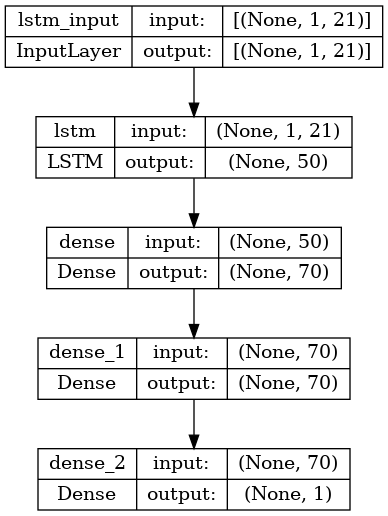

In [161]:
dot_img_file = "models/model_lstm_standardscalar.png"
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

# Testing LSTM with SGD

In [162]:
# opt_sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [163]:
# model = Sequential()
# model.add(LSTM(
#     50, #units
#     input_shape=(# (1, 21)
#         X_Train.shape[1],# 1 row
#         X_Train.shape[2]# 21 columns
#     )
# ))
# model.add(Dense(70)) # New hidden layer with 70 params
# model.add(Dense(70)) # New hidden layer with 70 params
# model.add(Dense(1))
# # New loss function (mse to mae)
# # New optimizer (adam to RMSprop)
# model.compile(loss='mae', optimizer=opt_rmsprop)

# # fit
# history = model.fit(
#     X_Train,
#     Y_Train,
#     epochs=17, # New epochs (70 to 17)
#     batch_size=64, # New batch_size (10 to 64)
#     validation_data=(X_Test, Y_Test),
#     verbose=2,
#     shuffle=False
# )

# Testing LSTM with Adam

In [164]:
# model = Sequential()
# model.add(LSTM(
#     50, #units
#     input_shape=(# (1, 21)
#         X_Train.shape[1],# 1 row
#         X_Train.shape[2]# 21 columns
#     )
# ))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')

# # fit
# history = model.fit(
#     X_Train,
#     Y_Train,
#     epochs=70,
#     batch_size=10,
#     validation_data=(X_Test, Y_Test),
#     verbose=2,
#     shuffle=False
# )

In [165]:
# model.summary()

## Plotting training history to show training progress

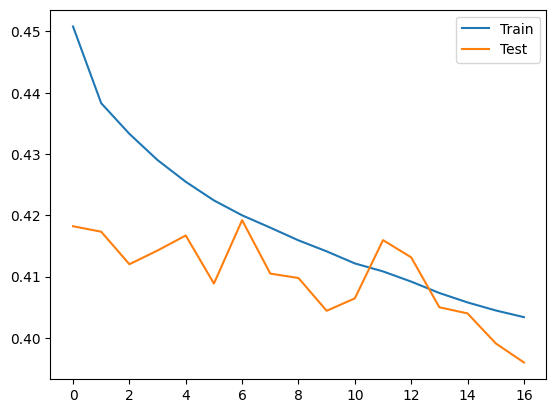

In [166]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

## Converting 'scaled' array into a dataframe (we did not use it but just printed for visualizing the data)

In [167]:
scaled.shape

(19735, 22)

In [168]:
sca=DataFrame(scaled)
sca.head()

0        1         2         3         4         5         6   \
0 -0.367676  0.82208  1.141572  1.843821 -1.235063  1.686130 -0.520411   
1 -0.367676  0.82208  1.134554  1.616807 -1.235063  1.704566 -0.520411   
2 -0.465215  0.82208  1.109032  1.517959 -1.235063  1.748608 -0.520411   
3 -0.465215  0.82208  1.082233  1.459321 -1.235063  1.769092 -0.520411   
4 -0.367676  0.82208  1.082233  1.526336 -1.235063  1.769092 -0.520411   

         7         8         9   ...        12        13        14        15  \
0 -2.976328  1.073683  1.219861  ...  1.506438  0.471160 -0.152647  0.958136   
1 -2.962813  1.057097  1.206825  ...  1.604528  0.471160 -0.174588  0.965363   
2 -2.949298  1.033550  1.182057  ...  1.580918  0.458968 -0.196529  0.950910   
3 -2.935783  1.024540  1.154030  ...  1.542526  0.458968 -0.218470  0.926821   
4 -2.922268  1.009797  1.142298  ...  1.497991  0.458968 -0.240411  0.926821   

         16        17        18        19        20        21  
0 -0.908217 -1.453646  0.366975  1.207694 -1.118645 -1.314903  
1 -0.908217 -1.453646  0.343135  1.071703 -1.118645 -1.314903  
2 -0.944115 -1.453646  0.319294  0.935713 -1.118645 -1.314903  
3 -0.962063 -1.485243  0.295454  0.799723 -1.118645 -1.314903  
4 -0.962063 -1.453646  0.271613  0.663733 -1.118645 -1.296832  

[5 rows x 22 columns]

In [169]:
sca.shape

(19735, 22)

## Evaluating the LSTM model

### - MAE / MSE / RMSE

In [170]:
lstm_test = model.evaluate(X_Test, Y_Test, batch_size=1)

5921/5921 [==============================] - 12s 2ms/step - loss: 0.3960


In [171]:
model_loss_function = model.loss.upper()
print ("\n - ", end="")

if (model_loss_function == "MAE"):
    print ("Mean Absolute Error (MAE):", end =" ")
elif (model_loss_function == "MSE"):
    print ("Mean Squared Error (MSE):", end =" ")
else:
    print ("Loss Function (LF):", end =" ")
print (lstm_test, "\n")


 - Mean Absolute Error (MAE): 0.39598241448402405 



### - R2 Score

In [172]:
y_pred_test_lstm = model.predict(X_Test)
y_train_pred_lstm = model.predict(X_Train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_Train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_Test, y_pred_test_lstm)))

432/432 [==============================] - 1s 2ms/step
The R2 score on the Train set is:	0.115
The R2 score on the Test set is:	0.120


## Plotting LSTM forecast, in comparison to the actual

186/186 [==============================] - 0s 2ms/step


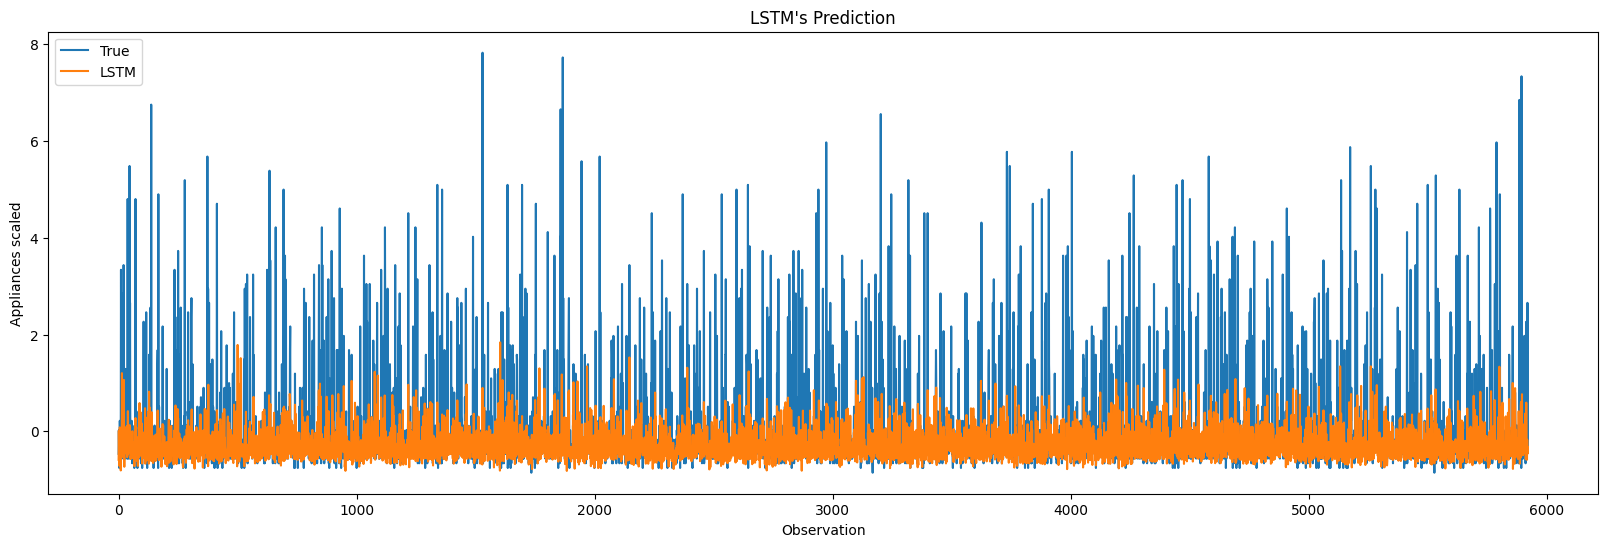

In [173]:
lstm_y_pred_test = model.predict(X_Test)
plt.figure(figsize=(20, 6))
plt.plot(Y_Test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Appliances scaled')
plt.legend()
plt.show();

### - RMSE

In [ ]:
# # before X and Y
# # X = values[:,:21]
# # Y = values[:,21]

# # mine X and Y
# X = values[:,1:22]
# Y = values[:,0]

In [ ]:
tmp_X_Test = X_Test
tmp_Y_Test = Y_Test

In [ ]:
# # make a prediction
# yhat = model.predict(X_Test)
# X_Test = X_Test.reshape((X_Test.shape[0], 21))

# # invert scaling for forecast
# inv_yhat = np.concatenate((yhat, X_Test[:, -21:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]

# # invert scaling for actual
# Y_Test = Y_Test.reshape((len(Y_Test), 1))
# inv_y = np.concatenate((Y_Test, X_Test[:, -21:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]

# # calculate RMSE
# rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
# print('Test RMSE: %.3f' % rmse)

### - MAPE

In [ ]:
# tmp_mape = tf.keras.losses.MeanAbsolutePercentageError(
#     reduction=tf.keras.losses.Reduction.SUM
# )
# tmp_mape(inv_y, inv_yhat).numpy()

# Testing

In [ ]:
# tmp_values = np.array(
#     [np.random.random(3) for element in range(4)]
# )

In [ ]:
# tmp_values

In [ ]:
# tmp_values[:,:2]

In [ ]:
# tmp_values[:,2]

In [ ]:
# tmp_values[0][0]

In [ ]:
# tmp_values[:,1:3]

In [ ]:
# print(
#     "tmp_values.shape {:},\ntmp_values[:,:1].shape {:},\ntmp_values[:,1].shape {:}".format(
#         tmp_values.shape, tmp_values[:,:1].shape, tmp_values[:,1].shape
#     )
# )

In [ ]:
# tmp_Y = tmp_values[:,1]

In [ ]:
# tmp_Y

In [ ]:
# del tmp_values, tmp_Y

In [ ]:
# input = tf.keras.Input(shape=(100,), dtype="int32", name="input")
# x = tf.keras.layers.Embedding(
#     output_dim=512,
#     input_dim=10000,
#     input_length=100
# )(input)

# x = tf.keras.layers.LSTM(32)(x)

# x = tf.keras.layers.Dense(64, activation="relu")(x)
# x = tf.keras.layers.Dense(64, activation="relu")(x)
# x = tf.keras.layers.Dense(64, activation="relu")(x)

# output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(x)

# model = tf.keras.Model(
#     inputs=[input],
#     outputs=[output]
# )

# dot_img_file = "models/xest_model.png"
# tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [176]:
tmp_n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1500, num = 10)]

In [177]:
tmp_n_estimators

[200, 344, 488, 633, 777, 922, 1066, 1211, 1355, 1500]